# 9Mer and 27Mer test form full jupyter

### other clusters will follow exact same setup

In [1]:
%clear
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas
#import MyPlot as MyPlot2

%matplotlib inline

mpl.rcParams['figure.dpi']=100
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['axes.facecolor']='white'        
mpl.rcParams['lines.linewidth']=2.0
mpl.rcParams['axes.linewidth']=2.0
mpl.rcParams['xtick.major.pad']=6
mpl.rcParams['ytick.major.pad']=6
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['axes.titlesize']=18
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['axes.grid']='True'
mpl.rcParams['axes.axisbelow']='line'
mpl.rcParams['legend.fontsize']=12

np.set_printoptions(precision=9)

In [2]:
# Energy of ideal water monomer INSERT THE DATA FROM THE CALCULATIONS ON SINGLE MOLECULES (SHOULD BE AROUND -67)

E_mono_blyp_631g = -76.4153839024  
E_mono_blypgd3_631g = -76.4161510875
E_mono_blypgd3bj_631g = -76.4168592325
E_mono_blyp_aug = -76.4493193257
E_mono_blypgd3_aug = -76.4492989035
E_mono_blypgd3bj_aug = -76.4500070485
E_mono_b3lyp_631g = -76.4340484523
E_mono_b3lypgd3_631g = -76.4161511994
E_mono_b3lypgd3bj_631g = -76.4167579985
E_mono_b3lyp_aug = -76.4661982521
E_mono_b3lypgd3_aug = -76.4492990154
E_mono_b3lypgd3bj_aug = -76.4499058145
#E_mono_b3lypg_D4 = #DA CALCOLARE


hartree2kcalmol = 627.509
ev2kcalmol = 23.061



In [3]:
class Cluster():
    def __init__(self):
        self.MAE = 0
        self.MSE = 0
        self.Err = 0
        self.data = []
        self.num = 0
    

def compute_error(data1, data2, axis=None, keepdims=True):
    MAE = np.mean(np.abs(data1 - data2))
    MSE = np.mean((data1 - data2)*(data1 - data2))
    Err = np.mean(data1 - data2)
    return MSE, MAE, Err

### Calculation Explanation

The final corrected, or to be corrected, therm will have the name in the format: DE_1enbody_Nmer_blyp_631g (will take blyp_631g as example hereoff)
I will now break down all the parts to see if the calculations are correct:

DE_1enbody_Nmer_blyp_631g = (DE_nbody_Nmer_blyp_631g) - (DE_1body_Nmer_blyp_631g)
i will expand the terms in brackets 
DE_1enbody_Nmer_blyp_631g = (DE_Nmer_blyp_631g - DMC_Nmer) - (DE_1body_DFT_Nmer_blyp_631g - DE_1body_MC_Nmer)

In the first bracket we have the cluster DE, in the second we have the single water DE, I will analyze them one by one now

DE_Nmer_blyp_631g  = ("the DFT Nmer blyp_631g calculation" - nclustermol*E_mono_blyp_aug) * hartree2kcalmol ) 
This therm gives us the difference in DFT level energy between an N-cluster composed of distorted molecules and an N-cluster composed of ideal geometry molecules, then we convert from atomic units to kcal/mol

DE_1body_MC_Nmer = nclustermol*np.array(nonamer["MC [eV]"]*ev2kcalmol) we multiply the gold standard montecarlo molecule level energy by the number of such molecules in the N-cluster, and convert to kcal/mol

By subtracting the above therms we should have the cluster delta energy, not acounting for the inter-monomer Van der Walls interaction; this is the level of acuracy in the acetonitrile paper.



DE_1body_DFT_Nmer_blyp_631g = (Sum_SW_Nmer_blyp_631g- nclustermol*E_mono_blyp_631g) * hartree2kcalmol )
This therm gives us the difference between the DFT level energy of an Ncluster composed of distorted single molecules and ideal single molecules, the we convert to kcal/mole; no inter molecular energy is counted here

DE_1body_MC_Nmer = np.sum(PS_1body_nonamer, axis=0) 
This therm gives us gold standard Ps_routine level energy for single molecule of water

By subtracting these 2 therms we should have the delta energy resulting from monomer to monomer Van der Walls interaction; this is the missing (beacause irrelevant) therm in the acetonitrile paper

-------------------------------------------------------------------------------------------------------------------------

Finally by subtracting the monomer delta energy from the cluster delta energy, we should be left with a quantity that, in the best case scenarion, will be constantly 0 in the plots (we already have subtracted the gold standards both from the cluster and from the monomer(single water) part): this is the quantity that we want to minimize with changes in the s8 parameter.

# NONAMER

In [13]:
nclustermol = 9.0


# Import the DFT energy of the 100 nonamer clusters imported energies are in hartree for the dft calculations and ev for montecarlo

nonamer = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\DFT_CALCULATIONS\nonamer.xlsx", index_col='Structure')
nonamer.head(5)

#Columns: [blyp/6-31+G(dp) no disp, blyp/6-31+G(dp) GD3 (S8=1,682000), blyp/6-31+G(dp) GD3BJ (S8=2.6996), 
 #         blyp/6-31+G(dp) corr D4 (S8=***), blyp/aug-cc-pVTZ no disp, blyp/aug-cc-pVTZ GD3 (S8=1-682000), 
  #        blyp/aug-cc-pVTZ GD3BJ (S8=2.6996), MC [eV], MC error [eV], b3lyp/6-31+G(dp) no disp, 
   #       b3lyp/6-31+G(dp) GD3 (S8=1.703000), b3lyp/6-31+G(dp) GD3BJ (S8=1.988900), 
    #      b3lyp/6-31+G(d.p) corr D4 (S8=***), b3lyp/aug-cc-pVTZ no disp, 
     #     b3lyp/aug-cc-pVTZ GD3 (S8=1.703000), b3lyp/aug-cc-pVTZ GD3BJ (S8=1.988900)]
            
print(len(nonamer))

print(nonamer[:5])
print(nonamer[145:]) # CONTROLLO CHE 145 VADA BENE



# Import and calculate Montercarlo e PS_routine n-body and 1-body term

DMC_nonamer = 9*np.array(nonamer["MC [eV]"]*ev2kcalmol) 

PS_1body_nonamer = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\PS_routine_nonamer.xlsx", index_col = 'Molecule')
print('PS_1body_nonamer')
print(PS_1body_nonamer)

# Sum distorsion energy of each of the 9 molecules inside each cluster and obtain a vector of 100 energies [kcal/mol]
DE_1body_MC_nonamer = np.sum(PS_1body_nonamer, axis=0)
print('DE_1body_MC_nonamer')
print(DE_1body_MC_nonamer)



# Import the DFT energy 1-body term of the 9 molecules inside each of the 100 nonamer clusters

# Column '1' = first cluster, '2' = second cluster, ...
# Row '1' = first molecule, '2' = second molecule, ... 

SW_Nonamer_blyp_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_blyp.xlsx", index_col = 'Molecule')
SW_Nonamer_blyp_631g.head(5)
print('SW_Nonamer_blyp_631g') 
print(SW_Nonamer_blyp_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_blyp_631g = np.sum(SW_Nonamer_blyp_631g, axis=0)   
print('Sum_SW_Nonamer_blyp_631g')
print(Sum_SW_Nonamer_blyp_631g)
print(Sum_SW_Nonamer_blyp_631g)


SW_Nonamer_blyp_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_blyp_aug.xlsx", index_col = 'Molecule')
SW_Nonamer_blyp_aug.head(5)
print(SW_Nonamer_blyp_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_blyp_aug = np.sum(SW_Nonamer_blyp_aug, axis=0)
print(Sum_SW_Nonamer_blyp_aug)

SW_Nonamer_b3lyp_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_b3lyp.xlsx", index_col = 'Molecule')
SW_Nonamer_b3lyp_631g.head(5)
print(SW_Nonamer_b3lyp_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_b3lyp_631g = np.sum(SW_Nonamer_b3lyp_631g, axis=0)
print(Sum_SW_Nonamer_b3lyp_631g)

SW_Nonamer_b3lyp_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_b3lyp_aug.xlsx", index_col = 'Molecule')
SW_Nonamer_b3lyp_aug.head(5)
print(SW_Nonamer_b3lyp_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_b3lyp_aug = np.sum(SW_Nonamer_b3lyp_aug, axis=0)
print(Sum_SW_Nonamer_b3lyp_aug)

SW_Nonamer_blypgd3_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_blyp_gd3.xlsx", index_col = 'Molecule')
SW_Nonamer_blypgd3_631g.head(5)
print(SW_Nonamer_blypgd3_631g)
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_blypgd3_631g = np.sum(SW_Nonamer_blypgd3_631g, axis=0)
print(Sum_SW_Nonamer_blypgd3_631g)

SW_Nonamer_blypgd3_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_blyp_aug_gd3.xlsx", index_col = 'Molecule')
SW_Nonamer_blypgd3_aug.head(5)
print(SW_Nonamer_blypgd3_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_blypgd3_aug = np.sum(SW_Nonamer_blypgd3_aug, axis=0)
print(Sum_SW_Nonamer_blypgd3_aug)


SW_Nonamer_b3lypgd3_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_b3lyp_gd3.xlsx", index_col = 'Molecule')
SW_Nonamer_b3lypgd3_631g.head(5)
print(SW_Nonamer_b3lypgd3_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_b3lypgd3_631g = np.sum(SW_Nonamer_b3lypgd3_631g, axis=0)
print(Sum_SW_Nonamer_b3lypgd3_631g)

SW_Nonamer_b3lypgd3_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_b3lyp_aug_gd3.xlsx", index_col = 'Molecule')
SW_Nonamer_b3lypgd3_aug.head(5)
print(SW_Nonamer_b3lypgd3_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_b3lypgd3_aug = np.sum(SW_Nonamer_b3lypgd3_aug, axis=0)
print(Sum_SW_Nonamer_b3lypgd3_aug)

SW_Nonamer_blypgd3bj_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_blyp_gd3bj.xlsx", index_col = 'Molecule')
SW_Nonamer_blypgd3bj_631g.head(5)
print(SW_Nonamer_blypgd3bj_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_blypgd3bj_631g = np.sum(SW_Nonamer_blypgd3bj_631g, axis=0)
print(Sum_SW_Nonamer_blypgd3bj_631g)



SW_Nonamer_b3lypgd3bj_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_b3lyp_gd3bj.xlsx", index_col = 'Molecule')
SW_Nonamer_b3lypgd3bj_631g.head(5)
print(SW_Nonamer_b3lypgd3bj_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_b3lypgd3bj_631g = np.sum(SW_Nonamer_b3lypgd3bj_631g, axis=0)
print(Sum_SW_Nonamer_b3lypgd3bj_631g)

SW_Nonamer_b3lypgd3bj_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Nonamer_b3lyp_aug_gd3bj.xlsx", index_col = 'Molecule')
SW_Nonamer_b3lypgd3bj_aug.head(5)
print(SW_Nonamer_b3lypgd3bj_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Nonamer_b3lypgd3bj_aug = np.sum(SW_Nonamer_b3lypgd3bj_aug, axis=0)
print(Sum_SW_Nonamer_b3lypgd3bj_aug)


DE_nonamer_blyp_631g = np.array((nonamer['blyp/6-31+G(dp) no disp'] - nclustermol*E_mono_blyp_631g) * hartree2kcalmol )
print('DE_nonamer_blyp_631g')
print(DE_nonamer_blyp_631g)
DE_nonamer_blypgd3_631g = np.array((nonamer['blyp/6-31+G(dp) GD3 (S8=1,682000)'] - nclustermol*E_mono_blypgd3_631g) * hartree2kcalmol )
DE_nonamer_blypgd3bj_631g = np.array((nonamer['blyp/6-31+G(dp) GD3BJ (S8=2.6996)'] - nclustermol*E_mono_blypgd3bj_631g) * hartree2kcalmol )
DE_nonamer_blypd4_631g = np.array((nonamer['blyp/6-31+G(dp) no disp'] + nonamer['blyp/6-31+G(dp) corr D4 (S8=***)'] - nclustermol*E_mono_blyp_631g) * hartree2kcalmol )

DE_1body_DFT_nonamer_blyp_631g = np.array((Sum_SW_Nonamer_blyp_631g- nclustermol*E_mono_blyp_631g) * hartree2kcalmol )
print('DE_1body_DFT_nonamer_blyp_631g')
print(DE_1body_DFT_nonamer_blyp_631g)
DE_1body_DFT_nonamer_blypgd3_631g = np.array( (Sum_SW_Nonamer_blypgd3_631g-nclustermol*E_mono_blypgd3_631g) * hartree2kcalmol )
print('DE_1body_DFT_nonamer_blypgd3_631g')
print(DE_1body_DFT_nonamer_blypgd3_631g)
DE_1body_DFT_nonamer_blypgd3bj_631g = np.array((Sum_SW_Nonamer_blypgd3bj_631g-nclustermol*E_mono_blypgd3bj_631g) * hartree2kcalmol )
print('DE_1body_DFT_nonamer_blypgd3bj_631g')
print(DE_1body_DFT_nonamer_blypgd3bj_631g)


DE_nonamer_blyp_aug = np.array((nonamer['blyp/aug-cc-pVTZ no disp'] - nclustermol*E_mono_blyp_aug) * hartree2kcalmol ) # senza correzioni di dispersione
DE_nonamer_blypgd3_aug = np.array((nonamer['blyp/aug-cc-pVTZ GD3 (S8=1-682000)'] - nclustermol*E_mono_blypgd3_aug) * hartree2kcalmol )
DE_nonamer_blypgd3bj_aug = np.array((nonamer['blyp/aug-cc-pVTZ GD3BJ (S8=2.6996)'] - nclustermol*E_mono_blypgd3bj_aug) * hartree2kcalmol )


DE_1body_DFT_nonamer_blyp_aug = np.array((Sum_SW_Nonamer_blyp_aug - nclustermol*E_mono_blyp_aug) * hartree2kcalmol ) # senza correzioni di dispersione
DE_1body_DFT_nonamer_blypgd3_aug = np.array((Sum_SW_Nonamer_blypgd3_aug - nclustermol*E_mono_blypgd3_aug) * hartree2kcalmol )#DE_1body_DFT_nonamer_blypgd3bj_aug = np.array((Sum_SW_Nonamer_blypgd3bj_aug - nclustermol*E_mono_blypgd3bj_aug)) * hartree2kcalmol )
# Ancora da fare quest'ultimo


DE_nonamer_b3lyp_631g = np.array((nonamer['b3lyp/6-31+G(dp) no disp'] - nclustermol*E_mono_b3lyp_631g) * hartree2kcalmol ) # senza correzioni di dispersione
DE_nonamer_b3lypgd3_631g = np.array((nonamer['b3lyp/6-31+G(dp) GD3 (S8=1.703000)'] - nclustermol*E_mono_b3lypgd3_631g) * hartree2kcalmol )
DE_nonamer_b3lypgd3bj_631g = np.array((nonamer['b3lyp/6-31+G(dp) GD3BJ (S8=1.988900)'] - nclustermol*E_mono_b3lypgd3bj_631g) * hartree2kcalmol )
# Ancora da fare


DE_1body_DFT_nonamer_b3lyp_631g = np.array((Sum_SW_Nonamer_b3lyp_631g - nclustermol*E_mono_b3lyp_631g) * hartree2kcalmol ) # senza correzioni di dispersione
DE_1body_DFT_nonamer_b3lypgd3_631g = np.array((Sum_SW_Nonamer_b3lypgd3_631g - nclustermol*E_mono_b3lypgd3_631g) * hartree2kcalmol) 
DE_1body_DFT_nonamer_b3lypgd3bj_631g = np.array((Sum_SW_Nonamer_b3lypgd3bj_631g - nclustermol*E_mono_b3lypgd3bj_631g) * hartree2kcalmol )
# Ancora da fare

DE_nonamer_b3lyp_aug = np.array((nonamer['b3lyp/aug-cc-pVTZ no disp'] - nclustermol*E_mono_b3lyp_aug) * hartree2kcalmol ) # senza correzioni di dispersione
DE_nonamer_b3lypgd3_aug = np.array((nonamer['b3lyp/aug-cc-pVTZ GD3 (S8=1.703000)'] - nclustermol*E_mono_b3lypgd3_aug) * hartree2kcalmol )
DE_nonamer_b3lypgd3bj_aug = np.array((nonamer['b3lyp/aug-cc-pVTZ GD3BJ (S8=1.988900)'] - nclustermol*E_mono_b3lypgd3bj_aug) * hartree2kcalmol )


DE_1body_DFT_nonamer_b3lyp_aug = np.array((Sum_SW_Nonamer_b3lyp_aug - nclustermol*E_mono_b3lyp_aug) * hartree2kcalmol ) # senza correzioni di dispersione
DE_1body_DFT_nonamer_b3lypgd3_aug = np.array((Sum_SW_Nonamer_b3lypgd3_aug - nclustermol*E_mono_b3lypgd3_aug) * hartree2kcalmol )
DE_1body_DFT_nonamer_b3lypgd3bj_aug = np.array((Sum_SW_Nonamer_b3lypgd3bj_aug - nclustermol*E_mono_b3lypgd3bj_aug) * hartree2kcalmol )





print('CALCOLO TERMINI n e 1body per blyp 631g')
DE_nbody_nonamer_blyp_631g = np.array(DE_nonamer_blyp_631g - DMC_nonamer)
print('DE_nbody_nonamer_blyp_631g')
print(DE_nbody_nonamer_blyp_631g)
DE_1body_nonamer_blyp_631g = np.array(DE_1body_DFT_nonamer_blyp_631g - DE_1body_MC_nonamer)
print('DE_1body_nonamer_blyp_631g')
print(DE_1body_nonamer_blyp_631g)
DE_1enbody_nonamer_blyp_631g = np.array(DE_nbody_nonamer_blyp_631g - DE_1body_nonamer_blyp_631g)
print('DE_1enbody_nonamer_blyp_631g')
print(DE_1enbody_nonamer_blyp_631g)


print('CALCOLO TERMINI n e 1body per blyp gd3 631g')
DE_nbody_nonamer_blypgd3_631g = np.array(DE_nonamer_blypgd3_631g - DMC_nonamer)
print('DE_nbody_nonamer_blypgd3_631g')
print(DE_nbody_nonamer_blypgd3_631g)
DE_1body_nonamer_blypgd3_631g = np.array(DE_1body_DFT_nonamer_blypgd3_631g - DE_1body_MC_nonamer)
print('DE_1body_nonamer_blypgd3_631g')
print(DE_1body_nonamer_blypgd3_631g)
DE_1enbody_nonamer_blypgd3_631g = np.array(DE_nbody_nonamer_blypgd3_631g - DE_1body_nonamer_blypgd3_631g)
print('DE_1enbody_nonamer_blypgd3_631g')
print(DE_1enbody_nonamer_blypgd3_631g)


print('CALCOLO TERMINI n e 1body per blyp gd3bj 631g')
DE_nbody_nonamer_blypgd3bj_631g = np.array(DE_nonamer_blypgd3bj_631g - DMC_nonamer)
print('DE_nbody_nonamer_blypgd3bj_631g')
print(DE_nbody_nonamer_blypgd3bj_631g)
DE_1body_nonamer_blypgd3bj_631g = np.array(DE_1body_DFT_nonamer_blypgd3bj_631g - DE_1body_MC_nonamer)
print('DE_1body_nonamer_blypgd3bj_631g')
print(DE_1body_nonamer_blypgd3bj_631g)
DE_1enbody_nonamer_blypgd3bj_631g = np.array(DE_nbody_nonamer_blypgd3bj_631g - DE_1body_nonamer_blypgd3bj_631g)
print('DE_1enbody_nonamer_blypgd3bj_631g')
print(DE_1enbody_nonamer_blypgd3bj_631g)


print('CALCOLO TERMINI n e 1body per blyp aug')
DE_nbody_nonamer_blyp_aug = np.array(DE_nonamer_blyp_aug - DMC_nonamer)
print('DE_nbody_nonamer_blyp_aug')
print(DE_nbody_nonamer_blyp_aug)
DE_1body_nonamer_blyp_aug = np.array(DE_1body_DFT_nonamer_blyp_aug - DE_1body_MC_nonamer)
print('DE_1body_nonamer_blyp_aug')
print(DE_1body_nonamer_blyp_aug)
DE_1enbody_nonamer_blyp_aug = np.array(DE_nbody_nonamer_blyp_aug - DE_1body_nonamer_blyp_aug)
print('DE_1enbody_nonamer_blyp_aug')
print(DE_1enbody_nonamer_blyp_aug)


print('CALCOLO TERMINI n e 1body per blyp gd3 aug')
DE_nbody_nonamer_blypgd3_aug = np.array(DE_nonamer_blypgd3_aug - DMC_nonamer)
print('DE_nbody_nonamer_blypgd3_aug')
print(DE_nbody_nonamer_blypgd3_aug)
DE_1body_nonamer_blypgd3_aug = np.array(DE_1body_DFT_nonamer_blypgd3_aug - DE_1body_MC_nonamer)
print('DE_1body_nonamer_blypgd3_aug')
print(DE_1body_nonamer_blypgd3_aug)
DE_1enbody_nonamer_blypgd3_aug = np.array(DE_nbody_nonamer_blypgd3_aug - DE_1body_nonamer_blypgd3_aug)
print('DE_1enbody_nonamer_blypgd3_aug')
print(DE_1enbody_nonamer_blypgd3_aug)


print('CALCOLO TERMINI n e 1body per b3lyp 631g')
DE_nbody_nonamer_b3lyp_631g = np.array(DE_nonamer_b3lyp_631g - DMC_nonamer)
print('DE_nbody_nonamer_b3lyp_631g')
print(DE_nbody_nonamer_b3lyp_631g)
DE_1body_nonamer_b3lyp_631g = np.array(DE_1body_DFT_nonamer_b3lyp_631g - DE_1body_MC_nonamer)
print('DE_1body_nonamer_b3lyp_631g')
print(DE_1body_nonamer_b3lyp_631g)
DE_1enbody_nonamer_b3lyp_631g = np.array(DE_nbody_nonamer_b3lyp_631g - DE_1body_nonamer_b3lyp_631g)
print('DE_1enbody_nonamer_b3lyp_631g')
print(DE_1enbody_nonamer_b3lyp_631g)


print('CALCOLO TERMINI n e 1body per b3lyp gd3 631g')
DE_nbody_nonamer_b3lypgd3_631g = np.array(DE_nonamer_b3lypgd3_631g - DMC_nonamer)
print('DE_nbody_nonamer_b3lypgd3_631g')
print(DE_nbody_nonamer_b3lypgd3_631g)
DE_1body_nonamer_b3lypgd3_631g = np.array(DE_1body_DFT_nonamer_b3lypgd3_631g - DE_1body_MC_nonamer)
print('DE_1body_nonamer_b3lypgd3_631g')
print(DE_1body_nonamer_b3lypgd3_631g)
DE_1enbody_nonamer_b3lypgd3_631g = np.array(DE_nbody_nonamer_b3lypgd3_631g - DE_1body_nonamer_b3lypgd3_631g)
print('DE_1enbody_nonamer_b3lypgd3_631g')
print(DE_1enbody_nonamer_b3lypgd3_631g)


print('CALCOLO TERMINI n e 1body per b3lyp gd3bj 631g')
DE_nbody_nonamer_b3lypgd3bj_631g = np.array(DE_nonamer_b3lypgd3bj_631g - DMC_nonamer)
print('DE_nbody_nonamer_b3lypgd3bj_631g')
print(DE_nbody_nonamer_b3lypgd3bj_631g)
DE_1body_nonamer_b3lypgd3bj_631g = np.array(DE_1body_DFT_nonamer_b3lypgd3bj_631g - DE_1body_MC_nonamer)
print('DE_1body_nonamer_b3lypgd3bj_631g')
print(DE_1body_nonamer_blypgd3bj_631g)
DE_1enbody_nonamer_b3lypgd3bj_631g = np.array(DE_nbody_nonamer_b3lypgd3bj_631g - DE_1body_nonamer_b3lypgd3bj_631g)
print('DE_1enbody_nonamer_b3lypgd3bj_631g')
print(DE_1enbody_nonamer_b3lypgd3bj_631g)


print('CALCOLO TERMINI n e 1body per b3lyp aug')
DE_nbody_nonamer_b3lyp_aug = np.array(DE_nonamer_b3lyp_aug - DMC_nonamer)
print('DE_nbody_nonamer_b3lyp_aug')
print(DE_nbody_nonamer_b3lyp_aug)
DE_1body_nonamer_b3lyp_aug = np.array(DE_1body_DFT_nonamer_b3lyp_aug - DE_1body_MC_nonamer)
print('DE_1body_nonamer_b3lyp_aug')
print(DE_1body_nonamer_b3lyp_aug)
DE_1enbody_nonamer_b3lyp_aug = np.array(DE_nbody_nonamer_b3lyp_aug - DE_1body_nonamer_b3lyp_aug)
print('DE_1enbody_nonamer_b3lyp_aug')
print(DE_1enbody_nonamer_b3lyp_aug)


print('CALCOLO TERMINI n e 1body per b3lyp gd3 aug')
DE_nbody_nonamer_b3lypgd3_aug = np.array(DE_nonamer_b3lypgd3_aug - DMC_nonamer)
print('DE_nbody_nonamer_b3lypgd3_aug')
print(DE_nbody_nonamer_b3lypgd3_aug)
DE_1body_nonamer_b3lypgd3_aug = np.array(DE_1body_DFT_nonamer_b3lypgd3_aug - DE_1body_MC_nonamer)
print('DE_1body_nonamer_b3lypgd3_aug')
print(DE_1body_nonamer_b3lypgd3_aug)
DE_1enbody_nonamer_b3lypgd3_aug = np.array(DE_nbody_nonamer_b3lypgd3_aug - DE_1body_nonamer_b3lypgd3_aug)
print('DE_1enbody_nonamer_b3lypgd3_aug')
print(DE_1enbody_nonamer_b3lypgd3_aug)


print('CALCOLO TERMINI n e 1body per b3lyp gd3bj aug')
DE_nbody_nonamer_b3lypgd3bj_aug = np.array(DE_nonamer_b3lypgd3bj_aug - DMC_nonamer)
print('DE_nbody_nonamer_b3lypgd3bj_aug')
print(DE_nbody_nonamer_b3lypgd3bj_aug)
DE_1body_nonamer_b3lypgd3bj_aug = np.array(DE_1body_DFT_nonamer_b3lypgd3bj_aug - DE_1body_MC_nonamer)
print('DE_1body_nonamer_b3lypgd3bj_aug')
print(DE_1body_nonamer_b3lypgd3bj_aug)
DE_1enbody_nonamer_b3lypgd3bj_aug = np.array(DE_nbody_nonamer_b3lypgd3bj_aug - DE_1body_nonamer_b3lypgd3bj_aug)
print('DE_1enbody_nonamer_b3lypgd3bj_aug')
print(DE_1enbody_nonamer_b3lypgd3bj_aug)
########################
#                      #
#                      #
#                      #
#                      #
########################  #Different s8 parameter data impor



########################
#                      #
#                      #
#                      #
#                      #
########################  






#Importing SingleWater and full cluster d4 corrections
########################
#                      #
#                      #
#                      #
#                      #
########################    not yet correct code for d4 correction

DE_nonamer_b3lyp_D4corection = np.array((nonamer['b3lyp/6-31+G(d.p) corr D4 (S8=***)']) * hartree2kcalmol )
DE_nonamer_b3lyp_D4 =(DE_nonamer_b3lyp_631g- DE_nonamer_b3lyp_D4corection)
SW_nonamer_b3lyp_D4correction = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\SINGLE_WATER\Xlsx energy files\SW_nonamer_b3lyp_d4corr.xlsx", index_col = 'Molecule') #da creare
Sum_SW_nonamer_b3lyp_D4 = np.sum(SW_nonamer_b3lyp_D4correction, axis=0)

#DE_1body_DFT_nonamer_blyp_D4 = np.array((Sum_SW_nonamer_b3lyp_D4 - nclustermol*E_mono_b3lypg_D4) * hartree2kcalmol ) 

DE_nbody_nonamer_b3lyp_D4 = np.array(DE_nonamer_b3lyp_D4 - DMC_nonamer)
#DE_1body_nonamer_b3lyp_D4 = np.array(DE_1body_DFT_nonamer_blyp_D4 - DE_1body_MC_nonamer)
#DE_1enbody_nonamer_b3lypD4 = np.array(DE_nbody_nonamer_b3lyp_D4 - DE_1body_nonamer_b3lyp_D4)

print("AAAAA")
print(DE_nonamer_b3lyp_D4corection)
print(DE_nonamer_b3lyp_D4)
print(SW_nonamer_b3lyp_D4correction)
print(Sum_SW_nonamer_b3lyp_D4)
print("AAAAAAA")
print(DE_nbody_nonamer_b3lyp_D4)
# Calculating the difference btw the DFT energy of the cluster and the sum of the DFT energies of the single waters 

########################
#                      #
#                      #
#                      #
#                      #
########################

print('SOTTRAGGO 9 MOLECOLE IDEALI')

print((DE_nonamer_blyp_631g - DMC_nonamer)[:10] )
print((DE_nonamer_blypgd3_631g - DMC_nonamer)[:10] )
#print((DE_nonamer_blypgd3bj_631g - DMC_nonamer)[:10] ) # controllo che la scala vada bene
print((DE_nonamer_b3lyp_631g - DMC_nonamer)[:10] )
print((DE_nonamer_b3lypgd3_631g - DMC_nonamer)[:10] )
print((DE_nonamer_b3lypgd3bj_631g - DMC_nonamer)[:10] )

print((DE_nonamer_blyp_aug - DMC_nonamer)[:10] )
print((DE_nonamer_blypgd3_aug - DMC_nonamer)[:10] )
print((DE_nonamer_blypgd3bj_aug - DMC_nonamer)[:10] ) # controllo che la scala vada bene
print((DE_nonamer_b3lyp_aug - DMC_nonamer)[:10] )
print((DE_nonamer_b3lypgd3_aug - DMC_nonamer)[:10] )
print((DE_nonamer_b3lypgd3bj_aug - DMC_nonamer)[:10] )


print('SOTTRAGGO 9 MOLECOLE DISTORTE CALCOLATE CON LA ROUTINE PS')

print((DE_1body_nonamer_blyp_631g - DMC_nonamer)[:10] )
print((DE_1body_nonamer_blypgd3_631g - DMC_nonamer)[:10] )
print((DE_1body_nonamer_blypgd3bj_631g - DMC_nonamer)[:10] ) # controllo che la scala vada bene
print((DE_1body_nonamer_b3lyp_631g - DMC_nonamer)[:10] )
print((DE_1body_nonamer_b3lypgd3_631g - DMC_nonamer)[:10] )
print((DE_1body_nonamer_b3lypgd3bj_631g - DMC_nonamer)[:10] )

print((DE_1body_nonamer_blyp_aug - DMC_nonamer)[:10] )
print((DE_1body_nonamer_blypgd3_aug - DMC_nonamer)[:10] )
#print((DE_1body_nonamer_blypgd3bj_aug - DMC_nonamer)[:10] ) # controllo che la scala vada bene
print((DE_1body_nonamer_b3lyp_aug - DMC_nonamer)[:10] )
print((DE_1body_nonamer_b3lypgd3_aug - DMC_nonamer)[:10] )
print((DE_1body_nonamer_b3lypgd3bj_aug - DMC_nonamer)[:10] )




MSE, MAE, Err = compute_error(DE_nonamer_blypgd3_631g, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_nonamer_blypgd3bj_631g, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_nonamer_b3lypgd3_631g, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_nonamer_b3lypgd3bj_631g, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_nonamer_blypgd3_aug, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_nonamer_blypgd3bj_aug, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_nonamer_b3lypgd3_aug, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_nonamer_b3lypgd3bj_aug, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)


MSE, MAE, Err = compute_error(DE_1body_nonamer_blypgd3_631g, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_1body_nonamer_blypgd3bj_631g, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_1body_nonamer_b3lypgd3_631g, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_1body_nonamer_b3lypgd3bj_631g, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_1body_nonamer_blypgd3_aug, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_nonamer_blypgd3bj_aug, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_1body_nonamer_b3lypgd3_aug, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_1body_nonamer_b3lypgd3bj_aug, DMC_nonamer)

print('### NONAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

# We have to perform calculations changing s8 parameters




100
           blyp/6-31+G(dp) no disp  blyp/6-31+G(dp) GD3 (S8=1,682000)  \
Structure                                                               
1                      -687.849972                        -687.879222   
2                      -687.852657                        -687.881924   
3                      -687.850595                        -687.878909   
4                      -687.847980                        -687.874941   
5                      -687.846644                        -687.875358   

           blyp/6-31+G(dp) GD3BJ (S8=2.6996)  \
Structure                                      
1                                -687.881786   
2                                -687.884350   
3                                -687.881632   
4                                -687.877862   
5                                -687.878316   

           blyp/6-31+G(dp) corr D4 (S8=***)  blyp/aug-cc-pVTZ no disp  \
Structure                                                               
1

                1          2          3          4          5          6    \
Molecule                                                                     
1        -76.433425 -76.433932 -76.431305 -76.433365 -76.433691 -76.431880   
2        -76.432208 -76.433155 -76.432671 -76.431983 -76.432778 -76.430954   
3        -76.432239 -76.431868 -76.432417 -76.431819 -76.428643 -76.432820   
4        -76.433303 -76.433694 -76.430004 -76.432817 -76.433463 -76.433341   
5        -76.430402 -76.431776 -76.431384 -76.429041 -76.433125 -76.430285   
6        -76.432733 -76.433738 -76.433934 -76.432994 -76.432588 -76.433197   
7        -76.433867 -76.432759 -76.433776 -76.433234 -76.432186 -76.432552   
8        -76.432939 -76.427871 -76.433433 -76.432860 -76.432912 -76.433152   
9        -76.433025 -76.433472 -76.433354 -76.433190 -76.431778 -76.433199   

                7          8          9          10   ...        91   \
Molecule                                              ...            

                1          2          3          4          5          6    \
Molecule                                                                     
1        -76.433436 -76.433941 -76.431318 -76.433375 -76.433700 -76.431889   
2        -76.432217 -76.433166 -76.432683 -76.431995 -76.432785 -76.430965   
3        -76.432246 -76.431879 -76.432431 -76.431825 -76.428657 -76.432832   
4        -76.433312 -76.433703 -76.430013 -76.432823 -76.433472 -76.433352   
5        -76.430414 -76.431786 -76.431390 -76.429053 -76.433135 -76.430298   
6        -76.432745 -76.433748 -76.433943 -76.433002 -76.432600 -76.433208   
7        -76.433876 -76.432767 -76.433786 -76.433243 -76.432195 -76.432562   
8        -76.432948 -76.427883 -76.433441 -76.432869 -76.432922 -76.433160   
9        -76.433034 -76.433480 -76.433361 -76.433200 -76.431789 -76.433209   

                7          8          9          10   ...        91   \
Molecule                                              ...            

                1          2          3          4          5          6    \
Molecule                                                                     
1        -76.449717 -76.449972 -76.447871 -76.449778 -76.449940 -76.448707   
2        -76.448961 -76.449201 -76.449032 -76.448622 -76.449193 -76.447900   
3        -76.448964 -76.448266 -76.448351 -76.447938 -76.445992 -76.449185   
4        -76.449041 -76.449542 -76.447332 -76.448669 -76.449834 -76.449215   
5        -76.446178 -76.448215 -76.448123 -76.446471 -76.448527 -76.447284   
6        -76.449147 -76.449873 -76.449683 -76.449559 -76.448986 -76.449511   
7        -76.449965 -76.449003 -76.449952 -76.449071 -76.449019 -76.448664   
8        -76.449490 -76.445095 -76.449743 -76.449403 -76.449102 -76.449632   
9        -76.449520 -76.449852 -76.449534 -76.449548 -76.447860 -76.448575   

                7          8          9          10   ...        91   \
Molecule                                              ...            

# 27MER

In [22]:
nclustermol = 27.0

Icosiheptamer = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\DFT_CALCULATIONS\icosiheptamer.xlsx") 

Icosiheptamer.head(5)

#Import golden stanrad data, montecarlo for the cluster and ps routine for single water term
PS_1body_Icosiheptamer = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\PS_routine_icosiheptamer.xlsx", index_col = 'Molecule')
print('PS_1body_Icosiheptamer')
print(PS_1body_Icosiheptamer)

DE_1body_MC_Icosiheptamer = np.sum(PS_1body_Icosiheptamer, axis=0)


SW_Icosiheptamer_blyp_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\PS_routine_Icosiheptamer.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_blyp_631g.head(5)
print('SW_Icosiheptamer_blyp_631g') 
print(SW_Icosiheptamer_blyp_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_icosiheptamer_blyp_631g = np.sum(SW_Icosiheptamer_blyp_631g, axis=0)


SW_Icosiheptamer_blyp_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_blyp_aug.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_blyp_aug.head(5)
print(SW_Icosiheptamer_blyp_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_blyp_aug = np.sum(SW_Icosiheptamer_blyp_aug, axis=0)
print(Sum_SW_Icosiheptamer_blyp_aug)

SW_Icosiheptamer_b3lyp_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_b3lyp.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_b3lyp_631g.head(5)
print(SW_Icosiheptamer_b3lyp_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_b3lyp_631g = np.sum(SW_Icosiheptamer_b3lyp_631g, axis=0)
print(Sum_SW_Icosiheptamer_b3lyp_631g)

SW_Icosiheptamer_b3lyp_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_b3lyp_aug.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_b3lyp_aug.head(5)
#print(SW_Icosiheptamer_b3lyp_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_b3lyp_aug = np.sum(SW_Icosiheptamer_b3lyp_aug, axis=0)
#print(Sum_SW_Icosiheptamer_b3lyp_aug)

SW_Icosiheptamer_blypgd3_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_blyp_gd3.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_blypgd3_631g.head(5)
print(SW_Icosiheptamer_blypgd3_631g)
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_blypgd3_631g = np.sum(SW_Icosiheptamer_blypgd3_631g, axis=0)
#print(Sum_SW_Icosiheptamer_blypgd3_631g)

SW_Icosiheptamer_blypgd3_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_blyp_aug_gd3.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_blypgd3_aug.head(5)
print(SW_Icosiheptamer_blypgd3_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_blypgd3_aug = np.sum(SW_Icosiheptamer_blypgd3_aug, axis=0)
#print(Sum_SW_Icosiheptamer_blypgd3_aug)


SW_Icosiheptamer_b3lypgd3_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_b3lyp_gd3.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_b3lypgd3_631g.head(5)
print(SW_Icosiheptamer_b3lypgd3_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_b3lypgd3_631g = np.sum(SW_Icosiheptamer_b3lypgd3_631g, axis=0)
#print(Sum_SW_Icosiheptamer_b3lypgd3_631g)

SW_Icosiheptamer_b3lypgd3_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_b3lyp_aug_gd3.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_b3lypgd3_aug.head(5)
print(SW_Icosiheptamer_b3lypgd3_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_b3lypgd3_aug = np.sum(SW_Icosiheptamer_b3lypgd3_aug, axis=0)
#print(Sum_SW_Icosiheptamer_b3lypgd3_aug)

SW_Icosiheptamer_blypgd3bj_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_blyp_gd3bj.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_blypgd3bj_631g.head(5)
print(SW_Icosiheptamer_blypgd3bj_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_blypgd3bj_631g = np.sum(SW_Icosiheptamer_blypgd3bj_631g, axis=0)
#print(Sum_SW_Icosiheptamer_blypgd3bj_631g)



SW_Icosiheptamer_b3lypgd3bj_631g = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_b3lyp_gd3bj.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_b3lypgd3bj_631g.head(5)
#print(SW_Icosiheptamer_b3lypgd3bj_631g) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_b3lypgd3bj_631g = np.sum(SW_Icosiheptamer_b3lypgd3bj_631g, axis=0)
#print(Sum_SW_Icosiheptamer_b3lypgd3bj_631g)

SW_Icosiheptamer_b3lypgd3bj_aug = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\Ultimi2\Single Water\SW_Icosiheptamer_b3lyp_aug_gd3bj.xlsx", index_col = 'Molecule')
SW_Icosiheptamer_b3lypgd3bj_aug.head(5)
#print(SW_Icosiheptamer_b3lypgd3bj_aug) 
# Sommo le energie delle 9 molecole di ciascun cluster e ottengo un vettore con 100 energie
Sum_SW_Icosiheptamer_b3lypgd3bj_aug = np.sum(SW_Icosiheptamer_b3lypgd3bj_aug, axis=0)
#print(Sum_SW_Icosiheptamer_b3lypgd3bj_aug)


DMC_Icosiheptamer = 27*np.array(Icosiheptamer["MC [eV]"]*ev2kcalmol) 


DE_Icosiheptamer_blyp_631g = np.array((Icosiheptamer['blyp/6-31+G(d,p) no disp'] - nclustermol*E_mono_blyp_631g) * hartree2kcalmol )
DE_Icosiheptamer_blypgd3_631g = np.array((Icosiheptamer['blyp/6-31+G(d,p) GD3 (S8=1,682000)'] - nclustermol*E_mono_blypgd3_631g) * hartree2kcalmol )
DE_Icosiheptamer_blypgd3bj_631g = np.array((Icosiheptamer['blyp/6-31+G(d,p) GD3BJ (S8=2,6996)'] - nclustermol*E_mono_blypgd3bj_631g) * hartree2kcalmol )

#DE_icosiheptamer_blyp_aug = np.array((icosiheptamer['blyp/aug-cc-pVTZ no disp'] - nclustermol*E_mono_b3lyp_aug) * hartree2kcalmol ) # senza correzioni di dispersione
#DE_Icosiheptamer_blypgd3_aug = np.array((Icosiheptamer['blyp/aug-cc-pVTZ GD3 (S8=1,682000)'] - nclustermol*E_mono_b3lypgd3_aug) * hartree2kcalmol )
#DE_icosiheptamer_blypgd3bj_aug = np.array((Icosiheptamer['blyp/aug-cc-pVTZ GD3BJ (S8=2,6996)'] - nclustermol*E_mono_b3lypgd3bj_aug) * hartree2kcalmol )
# e per la correzione d4 come faccio?

DE_Icosiheptamer_b3lyp_631g = np.array((Icosiheptamer['b3lyp/6-31+G(d,p) no disp'] - nclustermol*E_mono_blyp_aug) * hartree2kcalmol ) # senza correzioni di dispersione
DE_Icosiheptamer_b3lypgd3_631g = np.array((Icosiheptamer['b3lyp/6-31+G(d,p) GD3 (S8=1,703000)'] - nclustermol*E_mono_blypgd3_aug) * hartree2kcalmol )
DE_Icosiheptamer_b3lypgd3bj_631g = np.array((Icosiheptamer['b3lyp/6-31+G(d,p) GD3BJ (S8=1,988900)'] - nclustermol*E_mono_blypgd3bj_aug) * hartree2kcalmol )
# e per la correzione d4 come faccio?

#DE_icosiheptamer_b3lyp_aug = np.array((icosiheptamer['b3lyp/aug-cc-pVTZ no disp'] - nclustermol*E_mono_b3lyp_aug) * hartree2kcalmol ) # senza correzioni di dispersione
#DE_icosiheptamer_b3lypgd3_aug = np.array((icosiheptamer['b3lyp/aug-cc-pVTZ GD3 (S8=1.703000)'] - nclustermol*E_mono_b3lypgd3_aug) * hartree2kcalmol )
#DE_icosiheptamer_b3lypgd3bj_aug = np.array((icosiheptamer['b3lyp/aug-cc-pVTZ GD3BJ (S8=1.988900)'] - nclustermol*E_mono_b3lypgd3bj_aug) * hartree2kcalmol )
# e per la correzione d4 come faccio?




#DE_1body_DFT_Icosiheptamer_blyp_aug = np.array((Sum_SW_Icosiheptamer_blyp_aug - nclustermol*E_mono_blyp_aug) * hartree2kcalmol)
DE_1body_DFT_Icosiheptamer_blypgd3_aug = np.array((Sum_SW_Icosiheptamer_blypgd3_aug - nclustermol*E_mono_blypgd3_aug) * hartree2kcalmol )#DE_1body_DFT_nonamer_blypgd3bj_aug = np.array((Sum_SW_Nonamer_blypgd3bj_aug - nclustermol*E_mono_blypgd3bj_aug)) * hartree2kcalmol )




DE_1body_DFT_Icosiheptamer_b3lyp_631g = np.array((Sum_SW_Icosiheptamer_b3lyp_631g - nclustermol*E_mono_b3lyp_631g) * hartree2kcalmol ) # senza correzioni di dispersione
DE_1body_DFT_Icosiheptamer_b3lypgd3_631g = np.array((Sum_SW_Icosiheptamer_b3lypgd3_631g - nclustermol*E_mono_b3lypgd3_631g) * hartree2kcalmol) 
DE_1body_DFT_Icosiheptamer_b3lypgd3bj_631g = np.array((Sum_SW_Icosiheptamer_b3lypgd3bj_631g - nclustermol*E_mono_b3lypgd3bj_631g) * hartree2kcalmol )



#DE_1body_DFT_Icosiheptamer_b3lyp_aug = np.array((Sum_SW_Icosiheptamer_b3lyp_aug - nclustermol*E_mono_b3lyp_aug) * hartree2kcalmol ) # senza correzioni di dispersione
#DE_1body_DFT_Icosiheptamer_b3lypgd3_aug = np.array((Sum_SW_Icosiheptamer_b3lypgd3_aug - nclustermol*E_mono_b3lypgd3_aug) * hartree2kcalmol )
#DE_1body_DFT_Icosiheptamer_b3lypgd3bj_aug = np.array((Sum_SW_Icosiheptamer_b3lypgd3bj_aug - nclustermol*E_mono_b3lypgd3bj_aug) * hartree2kcalmol )


#DE_1body_DFT_Icosiheptamer_blyp_631g = np.array((Sum_SW_Icosiheptamer_blyp_631g - nclustermol*E_mono_blyp_631g) * hartree2kcalmol )
#print('DE_1body_DFT_Icosiheptamer_blyp_631g')
#print(DE_1body_DFT_Icosiheptamer_blyp_631g)
#DE_1body_DFT_Icosiheptamer_blypgd3_631g = np.array( (Sum_SW_Icosiheptamer_blypgd3_631g - nclustermol*E_mono_blypgd3_631g) * hartree2kcalmol )
#print('DE_1body_DFT_Icosiheptamer_blypgd3_631g')
#print(DE_1body_DFT_Icosiheptamer_blypgd3_631g)
#DE_1body_DFT_Icosiheptamer_blypgd3bj_631g = np.array((Sum_SW_Icosiheptamer_blypgd3bj_631g - nclustermol*E_mono_blypgd3bj_631g) * hartree2kcalmol )
#print('DE_1body_DFT_Icosiheptamer_blypgd3bj_631g')
#print(DE_1body_DFT_Icosiheptamer_blypgd3bj_631g)


print('CALCOLO TERMINI n e 1body per b3lyp 631g')
DE_nbody_Icosiheptamer_b3lyp_631g = np.array(DE_Icosiheptamer_b3lyp_631g - DMC_Icosiheptamer)
print('DE_nbody_Icosiheptamer_b3lyp_631g')
print(DE_nbody_Icosiheptamer_b3lyp_631g)
DE_1body_Icosiheptamer_b3lyp_631g = np.array(DE_1body_DFT_Icosiheptamer_b3lyp_631g - DE_1body_MC_Icosiheptamer)
print('DE_1body_Icosiheptamer_b3lyp_631g')
print(DE_1body_Icosiheptamer_b3lyp_631g)
DE_1enbody_Icosiheptamer_b3lyp_631g = np.array(DE_nbody_Icosiheptamer_b3lyp_631g - DE_1body_Icosiheptamer_b3lyp_631g)
print('DE_1enbody_icosiheptamer_b3lyp_631g')
print(DE_1enbody_Icosiheptamer_b3lyp_631g)


print('CALCOLO TERMINI n e 1body per b3lyp gd3 631g')
DE_nbody_Icosiheptamer_b3lypgd3_631g = np.array(DE_Icosiheptamer_b3lypgd3_631g - DMC_Icosiheptamer)
print('DE_nbody_Icosiheptamer_b3lypgd3_631g')
print(DE_nbody_Icosiheptamer_b3lypgd3_631g)
DE_1body_Icosiheptamer_b3lypgd3_631g = np.array(DE_1body_DFT_Icosiheptamer_b3lypgd3_631g - DE_1body_MC_Icosiheptamer)
print('DE_1body_Icosiheptamer_b3lypgd3_631g')
print(DE_1body_Icosiheptamer_b3lypgd3_631g)
DE_1enbody_Icosiheptamer_b3lypgd3_631g = np.array(DE_nbody_Icosiheptamer_b3lypgd3_631g - DE_1body_Icosiheptamer_b3lypgd3_631g)
print('DE_1enbody_Icosiheptamer_b3lypgd3_631g')
print(DE_1enbody_Icosiheptamer_b3lypgd3_631g)

print('CALCOLO TERMINI n e 1body per b3lyp gd3bj 631g')
DE_nbody_Icosiheptamer_b3lypgd3bj_631g = np.array(DE_Icosiheptamer_b3lypgd3bj_631g - DMC_Icosiheptamer)
print('DE_nbody_Icosiheptamer_b3lypgd3bj_631g')
print(DE_nbody_Icosiheptamer_b3lypgd3bj_631g)
DE_1body_Icosiheptamer_b3lypgd3bj_631g = np.array(DE_1body_DFT_Icosiheptamer_b3lypgd3bj_631g - DE_1body_MC_Icosiheptamer)
print('DE_1body_Icosiheptamer_b3lypgd3bj_631g')
print(DE_1body_Icosiheptamer_b3lypgd3bj_631g)
DE_1enbody_Icosiheptamer_b3lypgd3bj_631g = np.array(DE_nbody_Icosiheptamer_b3lypgd3bj_631g - DE_1body_Icosiheptamer_b3lypgd3bj_631g)
print('DE_1enbody_Icosiheptamer_b3lypgd3bj_631g')
print(DE_1enbody_Icosiheptamer_b3lypgd3bj_631g)

#print((DE_icosiheptamer_blyp_631g - DMC_icosiheptamer)[:10] )
#print((DE_icosiheptamer_blypgd3_631g - DMC_icosiheptamer)[:10] )
#print((DE_icosiheptamer_blypgd3bj_631g - DMC_icosiheptamer)[:10] ) # controllo che la scala vada bene
#print((DE_icosiheptamer_b3lyp_631g - DMC_icosiheptamer)[:10] )
#print((DE_icosiheptamer_b3lypgd3_631g - DMC_icosiheptamer)[:10] )
#print((DE_icosiheptamer_b3lypgd3bj_631g - DMC_icosiheptamer)[:10] )

#print((DE_icosiheptamer_blyp_aug - DMC_icosiheptamer)[:10] )
#print((DE_icosiheptamer_blypgd3_aug - DMC_icosiheptamer)[:10] )
#print((DE_icosiheptamer_blypgd3bj_aug - DMC_icosiheptamer)[:10] ) # controllo che la scala vada bene
#print((DE_icosiheptamer_b3lyp_aug - DMC_icosiheptamer)[:10] )
#print((DE_icosiheptamer_b3lypgd3_aug - DMC_icosiheptamer)[:10] )
#print((DE_icosiheptamer_b3lypgd3bj_aug - DMC_icosiheptamer)[:10] )


########################
#                      #
#                      #
#                      #
#                      #
########################  #Different s8 parameter data impor



########################
#                      #
#                      #
#                      #
#                      #
########################  






#Importing SingleWater and full cluster d4 corrections
########################
#                      #
#                      #
#                      #
#                      #
########################    not yet correct code for d4 correction

DE_Icosiheptamer_b3lyp_D4corection = np.array((Icosiheptamer['b3lyp/6-31+G(d,p) corr D4 (S8=***)']) * hartree2kcalmol )
DE_Icosiheptamer_b3lyp_D4 =(DE_Icosiheptamer_b3lyp_631g- DE_Icosiheptamer_b3lyp_D4corection)
SW_Icosiheptamer_b3lyp_D4correction = pandas.read_excel(r"C:\Users\sorod\Desktop\ProggettoDFT\WATER\SINGLE_WATER\Xlsx energy files\SW_nonamer_b3lyp_d4corr.xlsx", index_col = 'Molecule') #da creare
Sum_SW_Icosiheptamer_b3lyp_D4 = np.sum(SW_Icosiheptamer_b3lyp_D4correction, axis=0)

#DE_1body_DFT_Icosiheptamer_blyp_D4 = np.array((Sum_SW_Icosiheptamer_b3lyp_D4 - nclustermol*E_mono_b3lypg_D4) * hartree2kcalmol ) 

DE_nbody_Icosiheptamer_b3lyp_D4 = np.array(DE_Icosiheptamer_b3lyp_D4 - DMC_Icosiheptamer)
#DE_1body_Icosiheptamer_b3lyp_D4 = np.array(DE_1body_DFT_Icosiheptamer_blyp_D4 - DE_1body_MC_Icosiheptamer)
#DE_1enbody_Icosiheptamer_b3lypD4 = np.array(DE_nbody_Icosiheptamer_b3lyp_D4 - DE_1body_Icosiheptamer_b3lyp_D4)

print("BBBBB")
print(DE_Icosiheptamer_b3lyp_D4corection)
print(DE_Icosiheptamer_b3lyp_D4)
print(SW_Icosiheptamer_b3lyp_D4correction)
print(Sum_SW_Icosiheptamer_b3lyp_D4)
print("BBBBBB")
print(DE_nbody_Icosiheptamer_b3lyp_D4)
# Calculating the difference btw the DFT energy of the cluster and the sum of the DFT energies of the single waters 

########################
#                      #
#                      #
#                      #
#                      #
########################

MSE, MAE, Err = compute_error(DE_Icosiheptamer_blypgd3_631g, DMC_Icosiheptamer)

print('### ICOSIHEPTAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_Icosiheptamer_blypgd3bj_631g, DMC_Icosiheptamer)

print('### ICOSIHEPTAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_Icosiheptamer_b3lypgd3_631g, DMC_Icosiheptamer)

print('### ICOSIHEPTAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

MSE, MAE, Err = compute_error(DE_Icosiheptamer_b3lypgd3bj_631g, DMC_Icosiheptamer)

print('### ICOSIHEPTAMER ###')
print('Err     = ', Err)
print('MSE     = ', MSE)
print('MAE     = ', MAE)
print('MAE/mol = ', MAE / nclustermol)

#MSE, MAE, Err = compute_error(DE_Icosiheptamer_blypgd3_aug, DMC_Icosiheptamer)

#print('### ICOSIHEPTAMER ###')
#print('Err     = ', Err)
#print('MSE     = ', MSE)
#print('MAE     = ', MAE)
#print('MAE/mol = ', MAE / nclustermol)

PS_1body_Icosiheptamer
               1         2         3         4         5         6    \
Molecule                                                               
1         0.787240  0.240618  2.431538  0.783793  0.452901  1.744331   
2         1.471067  0.879960  1.460523  1.951750  0.821391  2.668759   
3         1.315263  1.783021  1.495386  1.210791  4.469408  1.320030   
4         0.467049  0.237253  3.044563  0.519214  0.550504  0.615882   
5         2.340740  1.715912  1.697043  3.963204  0.386433  3.313803   
6         1.401963  0.469837  0.012496  0.924154  1.524408  0.890676   
7         0.294486  0.887669  0.425502  0.556208  1.577149  1.231072   
8         1.079022  4.552180  0.479152  1.144617  0.949181  0.740485   
9         0.915599  0.574945  0.441086  0.880741  1.664006  0.301924   

               7         8         9         10   ...       91        92   \
Molecule                                          ...                       
1         0.784174  1.920834  

                1          2          3          4          5          6    \
Molecule                                                                     
1        -76.431446 -76.430684 -76.433169 -76.431941 -76.433174 -76.433706   
2        -76.433676 -76.431710 -76.430943 -76.433774 -76.431860 -76.433387   
3        -76.433603 -76.432688 -76.432363 -76.430292 -76.432806 -76.426648   
4        -76.433271 -76.430473 -76.432739 -76.432375 -76.431836 -76.432135   
5        -76.430802 -76.431644 -76.430198 -76.433049 -76.429277 -76.433865   
6        -76.425395 -76.432959 -76.428389 -76.431337 -76.433663 -76.430824   
7        -76.430787 -76.432108 -76.433950 -76.433864 -76.433568 -76.431428   
8        -76.432271 -76.431359 -76.433482 -76.431168 -76.433004 -76.433533   
9        -76.433035 -76.431857 -76.432005 -76.432900 -76.428838 -76.433258   
10       -76.432290 -76.425202 -76.431454 -76.431400 -76.433707 -76.432059   
11       -76.426270 -76.433520 -76.433443 -76.427895 -76.433451 

                1          2          3          4          5          6    \
Molecule                                                                     
1        -76.446420 -76.446591 -76.448933 -76.447936 -76.448685 -76.448637   
2        -76.449106 -76.447751 -76.446821 -76.448637 -76.447698 -76.448773   
3        -76.448724 -76.447988 -76.448045 -76.445089 -76.448454 -76.443768   
4        -76.448928 -76.446789 -76.447526 -76.447748 -76.447919 -76.446694   
5        -76.446217 -76.447552 -76.445233 -76.448380 -76.445601 -76.449058   
6        -76.442480 -76.447816 -76.444974 -76.447611 -76.448845 -76.446492   
7        -76.446686 -76.448092 -76.449204 -76.448886 -76.449178 -76.447650   
8        -76.447417 -76.447059 -76.448931 -76.447421 -76.448584 -76.448906   
9        -76.448359 -76.447269 -76.448052 -76.448358 -76.445328 -76.448955   
10       -76.447281 -76.442244 -76.447635 -76.447533 -76.449232 -76.447289   
11       -76.441972 -76.448837 -76.449067 -76.444168 -76.449082 

                1          2          3          4          5          6    \
Molecule                                                                     
1        -76.413713 -76.414575 -76.416516 -76.415755 -76.416358 -76.416135   
2        -76.416570 -76.415657 -76.414713 -76.416000 -76.415344 -76.416353   
3        -76.416066 -76.415326 -76.415834 -76.411739 -76.415798 -76.411776   
4        -76.416642 -76.414264 -76.415191 -76.415314 -76.415525 -76.414078   
5        -76.414286 -76.415113 -76.413201 -76.416182 -76.413760 -76.416646   
6        -76.410536 -76.415490 -76.412511 -76.415470 -76.416482 -76.413940   
7        -76.414675 -76.415721 -76.416601 -76.416376 -76.416774 -76.415296   
8        -76.415183 -76.414835 -76.416568 -76.415064 -76.416185 -76.416603   
9        -76.415726 -76.414323 -76.415903 -76.415931 -76.412991 -76.416621   
10       -76.415016 -76.410573 -76.415542 -76.415191 -76.416825 -76.414650   
11       -76.409457 -76.416544 -76.416714 -76.411807 -76.416533 

BBBBB
[-52.881605748 -56.257964489 -52.619462253 -56.10532837  -53.263761539
 -50.635623181 -54.925793524 -52.748900622 -58.110214412 -49.06968747
 -53.420839032 -53.702875803 -52.73131053  -54.378536465 -51.277981513
 -51.11366735  -54.790085286 -56.094533936 -51.932744591 -59.346062502
 -58.451194396 -55.392332845 -60.86199135  -56.582196328 -60.100892034
 -57.994126193 -60.96035204  -61.300131763 -61.688512826 -60.138507948
 -59.887446538 -59.542916554 -58.539536641 -61.294917694 -59.800104626
 -62.282890663 -59.016489261 -55.806290702 -58.631779646 -64.246312509
 -64.909999722 -64.932766519 -64.615220668 -65.634882018 -65.704537306
 -63.652558093 -63.496431989 -64.636731373 -63.260087881 -64.662087488
 -62.982129408 -60.620617484 -67.781647492 -63.350888386 -63.187611057
 -65.62474211  -64.696385029 -61.940103243 -65.266179164 -67.002642334
 -71.363639183 -72.33722621  -68.754026469 -70.484374753 -69.015530043
 -70.912860612 -70.392819238 -74.288826265 -68.540369123 -71.099446271
 

# PLOT SETTING


### Is the same in the full notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt; import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

#plt.style.use('default')

#%matplotlib inline

#Do mpl global settings
#axes.facecolor      : white   # axes background color
#axes.edgecolor      : black   # axes edge color
#axes.linewidth      : 0.8     # edge linewidth
#axes.grid           : False   # display grid or not
#axes.titlesize      : large   # fontsize of the axes title
#axes.titlepad       : 6.0     # pad between axes and title in points
#axes.labelsize      : medium  # fontsize of the x any y labels
#axes.labelpad       : 4.0     # space between label and axis
#axes.labelweight    : normal  # weight of the x and y labels
#axes.labelcolor     : black
#axes.axisbelow      : 'line'  # draw axis gridlines and ticks below
                               # patches (True); above patches but below
                               # lines ('line'); or above all (False)


#font.family         : sans-serif
#font.serif          : DejaVu Serif, Bitstream Vera Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif
#font.sans-serif     : DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
#font.cursive        : Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive
#font.fantasy        : Comic Sans MS, Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy
#font.monospace      : DejaVu Sans Mono, Bitstream Vera Sans Mono, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace
mpl.rcParams['font.size']=10.0
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.style']='normal'
mpl.rcParams['font.variant']='normal'
mpl.rcParams['font.serif']='Times New Roman'
mpl.rcParams['font.weight']=400 #'normal'  # 'normal', 'lighter'
#mpl.rcParams["mathtext.fontset"] = "Times New Roman"

mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['figure.figsize']=(4.0,3.0)     #figure size
mpl.rcParams['figure.dpi']=100
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['lines.linewidth']=1.0
mpl.rcParams['axes.linewidth']=0.75
mpl.rcParams['axes.titlesize']=12
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['axes.labelpad']=0.5
mpl.rcParams['axes.grid']='False'
mpl.rcParams['axes.axisbelow']='line'

mpl.rcParams['xtick.direction']='in'
mpl.rcParams['xtick.major.size']=5
mpl.rcParams['xtick.minor.size']=3
mpl.rcParams['xtick.major.width']=0.8
mpl.rcParams['xtick.minor.width']=0.8
mpl.rcParams['xtick.major.pad']=4
mpl.rcParams['xtick.labelsize']=12

mpl.rcParams['ytick.right']='True'
mpl.rcParams['ytick.direction']='in'
mpl.rcParams['ytick.major.size']=5
mpl.rcParams['ytick.minor.size']=3
mpl.rcParams['ytick.major.width']=0.8
mpl.rcParams['ytick.minor.width']=0.8
mpl.rcParams['ytick.major.pad']=4
mpl.rcParams['ytick.labelsize']=12

mpl.rcParams['legend.fontsize']=12

class MyPlot:
    """
    This is my class
    """
    def __init__(self):
        """
        Init
        """
        self.Xaxis = []
        self.Yaxis = []
        self.Xerr  = []
        self.Yerr_Y  = []
        self.Yerr_dY = []
        self.color = ['k', 'r', 'b', 'g', 'c', 'm', 'y', 'w']
        self.color_err = ['k', 'r', 'b', 'g', 'c', 'm', 'y', 'w']
        self.linestyle = ['-', '-', '-', '-', '-', '-', '-', '-']
        self.marker = [None, None, None, None, None, None, None, None]

        self.nYerrbar = 10

        self.xlabel = 'X'
        self.xmin = 0.0
        self.xmax = 1.0
        self.xtick_min = 1.0
        self.xtick_max = 1.0
        self.xticks = []
        self.xticklabels = []

        self.ylabel = 'Y'
        self.ymin = 0.0
        self.ymax = 1.0
        self.ytick_min = 1.0
        self.ytick_max = 1.0
        self.yticks = []
        self.filename = 'myplot.png'
        self.figure_dpi = 310
        
       
       
    def SetYaxis(self, axis=None, yaxis=None, color=None, linestyle=None, marker=None):
        """
        # ------------------------------ #
        # Set Axis                        #
        # -------------------------------#
        """
        if yaxis is not None:
            self.Yaxis[:,axis] = yaxis
        if color is not None:
            self.color[axis] = color
        if linestyle is not None:
            self.linestyle[axis] = linestyle
        if marker is not None:
            self.marker[axis] = marker
           

    def DoPlot(self):
        """
        # ------------------------------ #
        # Do Plot                        #
        # -------------------------------#
        """
        fig, axes = plt.subplots(nrows=1, ncols=1, dpi=self.figure_dpi) 
     
     
      
        

        # color = ('k', 'r', 'b', 'g', 'c', 'm', 'y', 'w')

        if (self.Yaxis.ndim > 1):
            nYaxis = len(self.Yaxis[0])
            for i in range(nYaxis):
                axes.plot(self.Xaxis, self.Yaxis[:,i], label=str(i), color=self.color[i], 
                          linestyle=self.linestyle[i], marker=self.marker[i])
         

        elif (self.Yaxis.ndim == 1):
                axes.plot(self.Xaxis, self.Yaxis, label=str(0), color=self.color[0], 
                          linestyle=self.linestyle[0], marker=self.marker[0])
                     

        if (len(self.Yerr_Y) != 0):
            if (self.Yerr_Y.ndim > 1):
                nYerr = len(self.Yerr_Y[0])
                for i in range(nYerr):
                    nskip = int(len(self.Xerr[:,i]) / self.nYerrbar)
                    axes.errorbar(self.Xerr[::nskip, i], self.Yerr_Y[::nskip, i], yerr=self.Yerr_dY[::nskip, i],
                                  elinewidth=1.5, capsize=3, color=self.color_err[i], fmt='none')
                                  
            elif (self.Yerr_Y.ndim == 1):
                nskip = int(len(self.Xerr) / self.nYerrbar)
                axes.errorbar(self.Xerr[::nskip], self.Yerr_Y[::nskip], yerr=self.Yerr_dY[::nskip],
                              elinewidth=1.5, capsize=3, color=self.color_err[0], fmt='none')
                            

        axes.set_xlim(self.xmin, self.xmax)
        axes.set_ylim(self.ymin, self.ymax)

        xticks_major = np.arange(self.xmin, self.xmax, self.xtick_max)
        xticks_minor = np.arange(self.xmin, self.xmax, self.xtick_min)
        yticks_major = np.arange(self.ymin, self.ymax, self.ytick_max)
        yticks_minor = np.arange(self.ymin, self.ymax, self.ytick_min)

        axes.set_xticks(xticks_major)
        axes.set_xticks(xticks_minor, minor=True)
        axes.set_yticks(yticks_major)
        axes.set_yticks(yticks_minor, minor=True)
        if self.xticks is not None or self.xticklabels is not None:
            axes.set_xticks(self.xticks)
            axes.set_xticklabels(self.xticklabels)

        axes.set_xlabel(self.xlabel)
        axes.set_ylabel(self.ylabel)

        #yticks(np.linspace(12/16., 1, 5), ('12/16', '13/16', '14/16', '15/16', '16/16') )

        #xticks = np.linspace(0.2,1.4,5)
        #axes.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # plt.legend()
        plt.tight_layout()
        plt.savefig(self.filename)
     
       
    
class MClass:
    """
    This is my second class
    """
    a = 10
    def func(self):
        print('Hello')

# Actuall Plots

### TBD exact plots to be put in final notebook 

## Nonamer

### B3lyp vs B3lyp gd3

-3.818525264031044
-21.14840078622402
2.713296514813729
1.928501167530932
2.574196783160937
1.3596735805352564


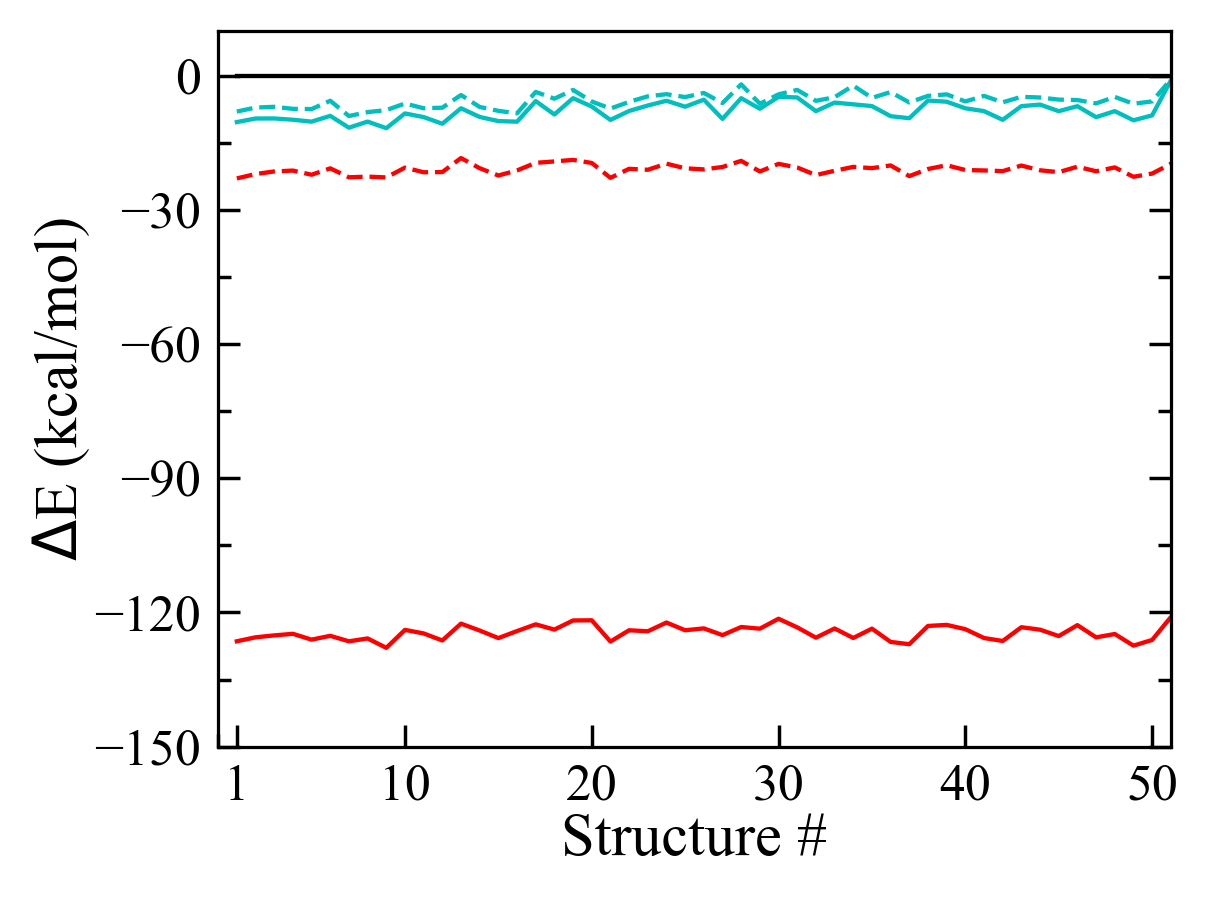

In [15]:
pl = MyPlot()


# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "9Mer_B3lyp_vs_B3lyp_gd3.png"

nsamples = 5
nlines = len(DE_nbody_nonamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(nonamer.index)
ZeroAxis = np.zeros(nlines)


pl.SetYaxis(0, DE_nbody_nonamer_b3lyp_631g, 'c', '-')
pl.SetYaxis(1, DE_nbody_nonamer_b3lypgd3_631g, 'r', '-')  
pl.SetYaxis(2, DE_1enbody_nonamer_b3lyp_631g, 'c', '--')
pl.SetYaxis(3, DE_1enbody_nonamer_b3lypgd3_631g, 'r', '--') 
pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -150.0, 10.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001


# Do plot
pl.DoPlot()

print(np.mean(DE_1enbody_nonamer_b3lyp_631g))
print(np.mean(DE_1enbody_nonamer_b3lypgd3_631g))

print(np.std(DE_nbody_nonamer_b3lyp_631g))
print(np.std(DE_nbody_nonamer_b3lypgd3_631g))

print(np.std(DE_1enbody_nonamer_b3lyp_631g))
print(np.std(DE_1enbody_nonamer_b3lypgd3_631g))

### B3lyp gd3 vs B3lyp bjgd3

-19.168550385797385
-21.14840078622402
1.9869114057182826
1.928501167530932
1.4408907354827605
1.3596735805352564


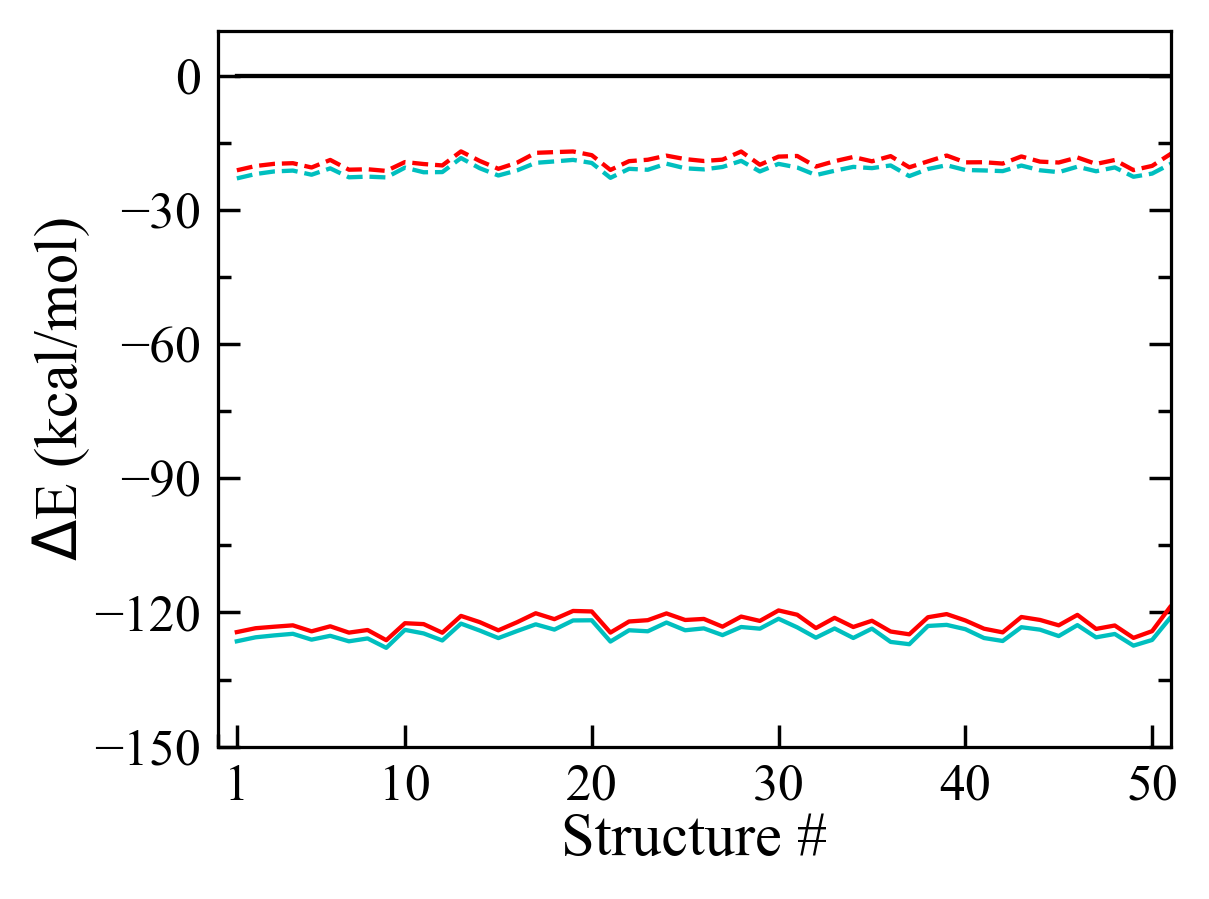

In [16]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "9Mer_B3lypgd3_vs_B3lypbjgd3.png"

nsamples = 5
nlines = len(DE_nbody_nonamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(nonamer.index)
ZeroAxis = np.zeros(nlines)


pl.SetYaxis(0, DE_nbody_nonamer_b3lypgd3_631g, 'c', '-')
pl.SetYaxis(1, DE_nbody_nonamer_b3lypgd3bj_631g, 'r', '-')  
pl.SetYaxis(2, DE_1enbody_nonamer_b3lypgd3_631g, 'c', '--')
pl.SetYaxis(3, DE_1enbody_nonamer_b3lypgd3bj_631g, 'r', '--') 
pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -150.0, 10.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

print(np.mean(DE_1enbody_nonamer_b3lypgd3bj_631g))
print(np.mean(DE_1enbody_nonamer_b3lypgd3_631g))

print(np.std(DE_nbody_nonamer_b3lypgd3bj_631g))
print(np.std(DE_nbody_nonamer_b3lypgd3_631g))

print(np.std(DE_1enbody_nonamer_b3lypgd3bj_631g))
print(np.std(DE_1enbody_nonamer_b3lypgd3_631g))

### 9MER B3lyp vs B3lyp aug both corrected gd3

-7.619187830139723
-21.14840078622402
1.2520562151469112
1.928501167530932
0.9790009565603631
1.3596735805352564


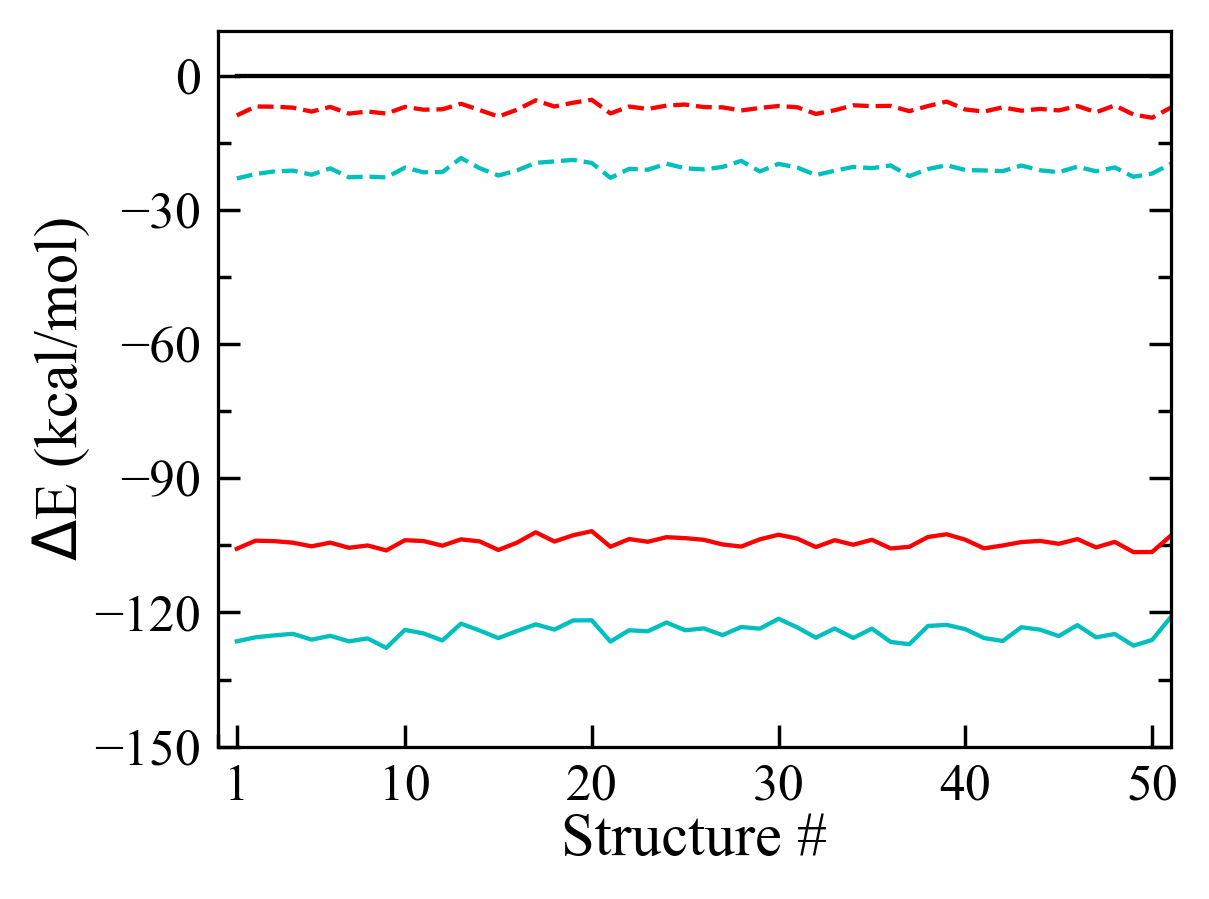

In [17]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "9Mer_B3lypgd3_vs_B3lypbjgd3.png"

nsamples = 5
nlines = len(DE_nbody_nonamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(nonamer.index)
ZeroAxis = np.zeros(nlines)


pl.SetYaxis(0, DE_nbody_nonamer_b3lypgd3_631g, 'c', '-')
pl.SetYaxis(1, DE_nbody_nonamer_b3lypgd3_aug, 'r', '-')  
pl.SetYaxis(2, DE_1enbody_nonamer_b3lypgd3_631g, 'c', '--')
pl.SetYaxis(3, DE_1enbody_nonamer_b3lypgd3_aug, 'r', '--') 
pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -150.0, 10.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

print(np.mean(DE_1enbody_nonamer_b3lypgd3_aug))
print(np.mean(DE_1enbody_nonamer_b3lypgd3_631g))

print(np.std(DE_nbody_nonamer_b3lypgd3_aug))
print(np.std(DE_nbody_nonamer_b3lypgd3_631g))

print(np.std(DE_1enbody_nonamer_b3lypgd3_aug))
print(np.std(DE_1enbody_nonamer_b3lypgd3_631g))

### 9 mer gd3 vs D4 correction last 9mer plot STILL TO BE DONE
    

4.169291650756401
1.928501167530932


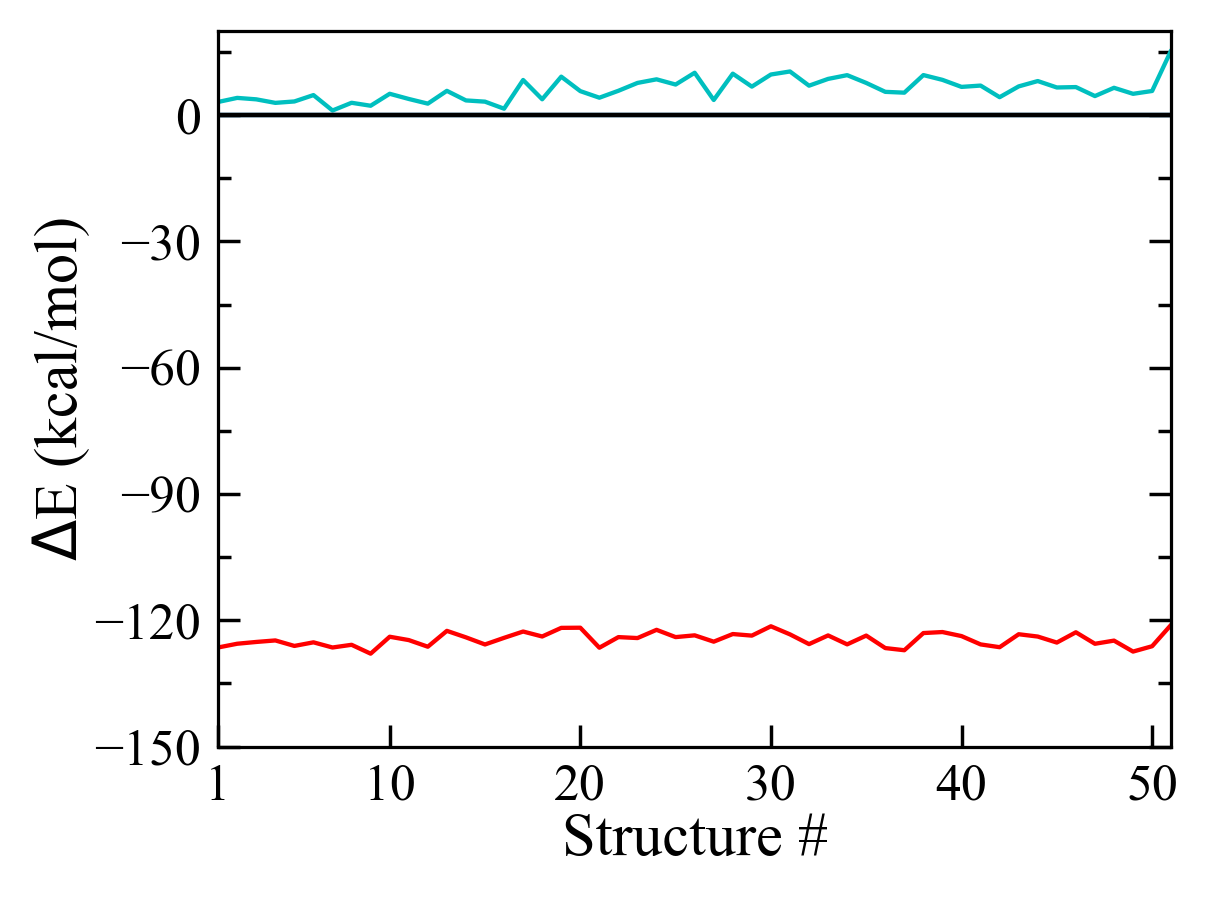

In [32]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "9Mer_B3lypgd3_vs_B3lypD4.png"

nsamples = 5
nlines = len(DE_nbody_nonamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(nonamer.index)
ZeroAxis = np.zeros(nlines)


pl.SetYaxis(0, DE_nbody_nonamer_b3lypgd3_631g, 'r', '-')
pl.SetYaxis(1, DE_nbody_nonamer_b3lyp_D4, 'c', '-')  

pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 10.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -150.0, 20.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

#print(np.mean(DE_1enbody_nonamer_b3lypgd3_631g))
#print(np.mean(DE_1enbody_nonamer_b3lyp_D4))

print(np.std(DE_nbody_nonamer_b3lyp_D4))
print(np.std(DE_nbody_nonamer_b3lypgd3_631g))

#print(np.std(DE_1enbody_nonamer_b3lyp_D4))
#print(np.std(DE_1enbody_nonamer_b3lypgd3_631g))

# 27-mer plots

### B3lypgd3 vs B3lypbjgd3

In [ ]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "27Mer_B3lypgd3_vs_B3lypbjgd3.png"

nsamples = 5
nlines = len(DE_nbody_Icosiheptamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(Icosiheptamer.index)
ZeroAxis = np.zeros(nlines)

pl.SetYaxis(0, DE_nbody_Icosiheptamer_b3lypgd3_631g, 'c', '-')
pl.SetYaxis(1, DE_nbody_Icosiheptamer_b3lypgd3bj_631g, 'r', '-')  
pl.SetYaxis(2, DE_1enbody_Icosiheptamer_b3lypgd3_631g, 'c', '--')
pl.SetYaxis(3, DE_1enbody_Icosiheptamer_b3lypgd3bj_631g, 'r', '--') 
pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -10.0, 500.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

print(np.mean(DE_1enbody_Icosiheptamer_b3lypgd3_631g))
print(np.mean(DE_1enbody_Icosiheptamer_b3lypgd3bj_631g))

print(np.std(DE_nbody_Icosiheptamer_b3lypgd3bj_631g))
print(np.std(DE_nbody_Icosiheptamer_b3lypgd3_631g))

print(np.std(DE_1enbody_Icosiheptamer_b3lypgd3bj_631g))
print(np.std(DE_1enbody_Icosiheptamer_b3lypgd3_631g))

## 27Mer B3lyp vs B3lyp gd3

442.6938077562827
217.21789428952056
8.534347286534622
4.500202710147576
11.093946634714035
10.485763116370922


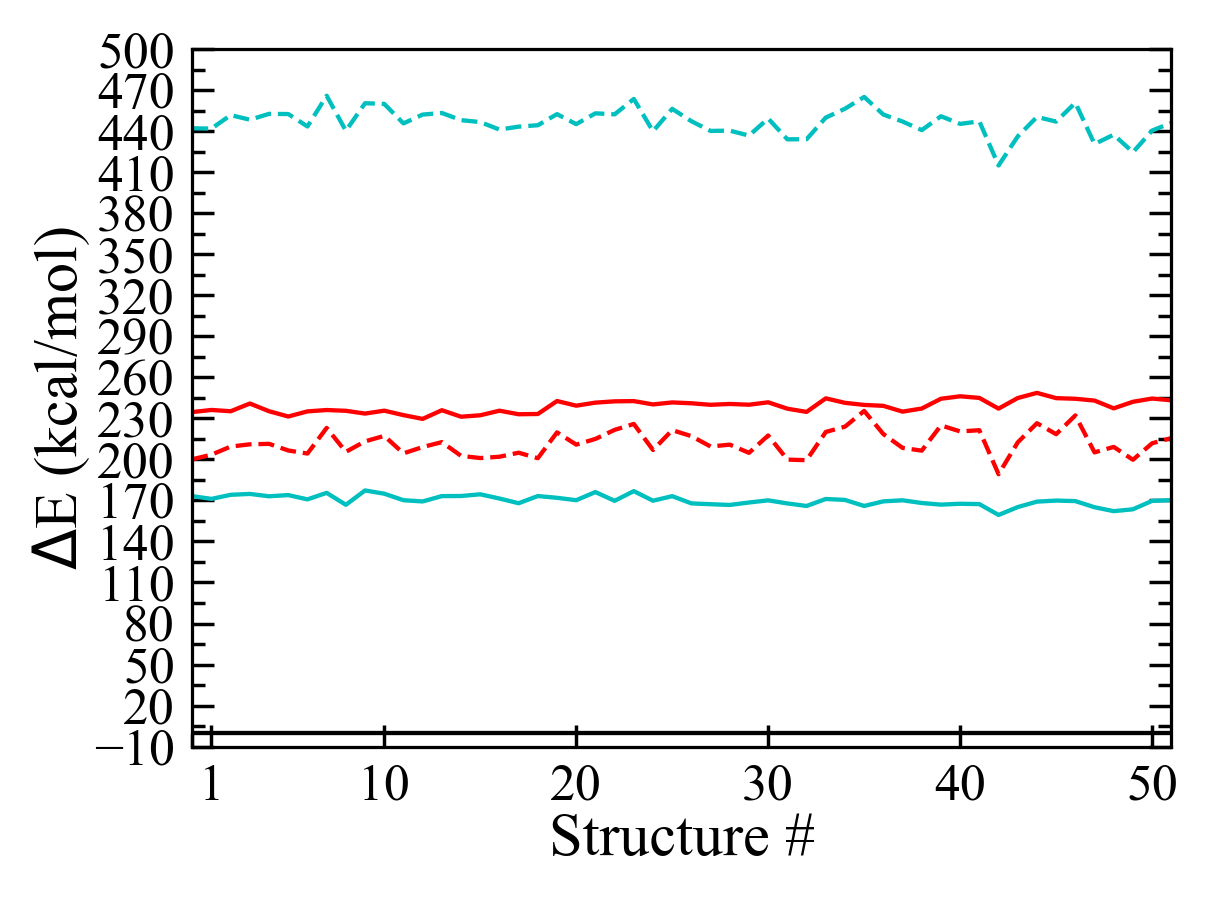

In [12]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "27Mer_B3lypgd3_vs_B3lyp.png"

nsamples = 5
nlines = len(DE_nbody_Icosiheptamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(Icosiheptamer.index)
ZeroAxis = np.zeros(nlines)

pl.SetYaxis(0, DE_nbody_Icosiheptamer_b3lypgd3_631g, 'c', '-')
pl.SetYaxis(1, DE_nbody_Icosiheptamer_b3lyp_631g, 'r', '-')  
pl.SetYaxis(2, DE_1enbody_Icosiheptamer_b3lypgd3_631g, 'c', '--')
pl.SetYaxis(3, DE_1enbody_Icosiheptamer_b3lyp_631g, 'r', '--') 
pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -10.0, 500.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

print(np.mean(DE_1enbody_Icosiheptamer_b3lypgd3_631g))
print(np.mean(DE_1enbody_Icosiheptamer_b3lyp_631g))

print(np.std(DE_nbody_Icosiheptamer_b3lyp_631g))
print(np.std(DE_nbody_Icosiheptamer_b3lypgd3_631g))

print(np.std(DE_1enbody_Icosiheptamer_b3lyp_631g))
print(np.std(DE_1enbody_Icosiheptamer_b3lypgd3_631g))

### 27Mer B3lyp gd3 vs B3lyp D4

16.611106743665847
4.500202710147576


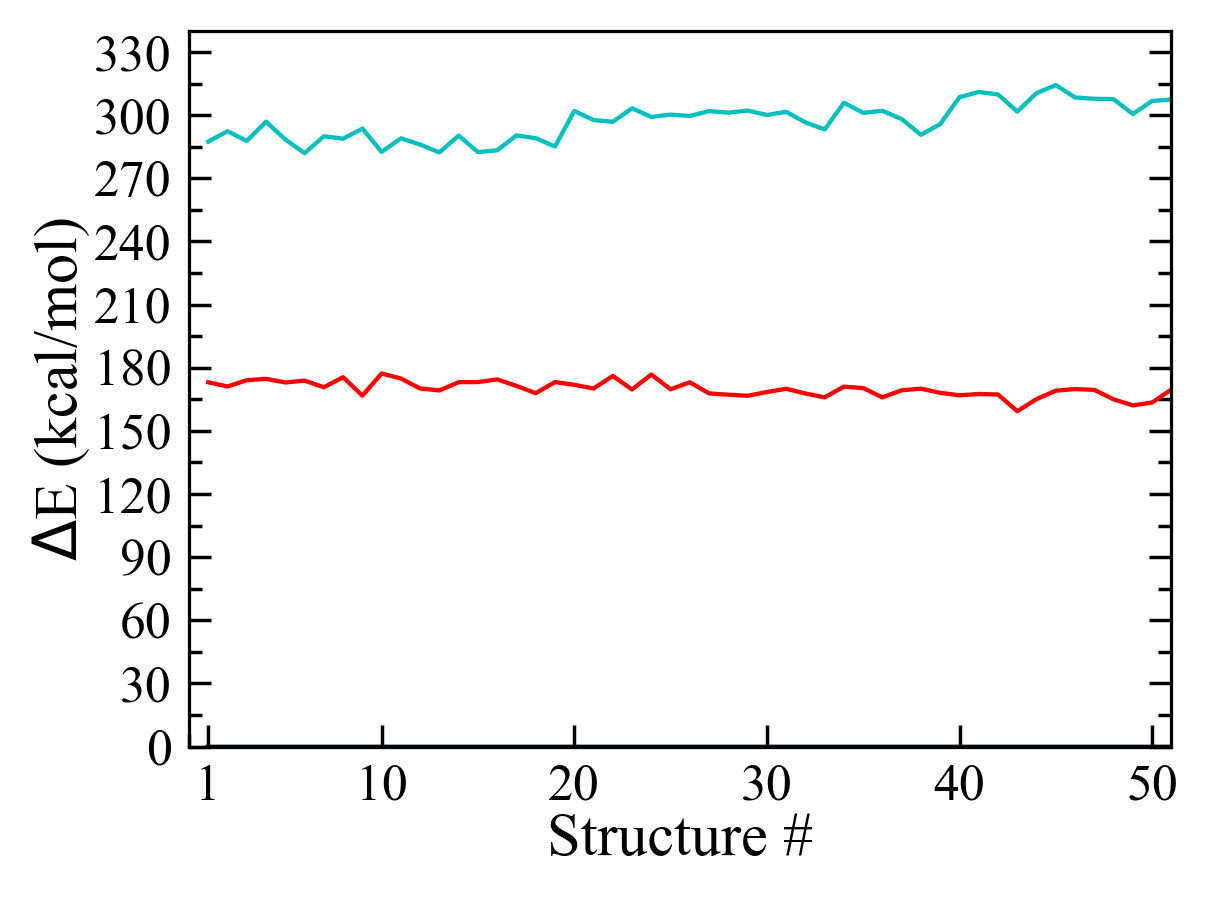

In [33]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "27Mer_B3lypgd3_vs_B3lypD4.png"

nsamples = 5
nlines = len(DE_nbody_Icosiheptamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(nonamer.index)
ZeroAxis = np.zeros(nlines)


pl.SetYaxis(0, DE_nbody_Icosiheptamer_b3lypgd3_631g, 'r', '-')
pl.SetYaxis(1, DE_nbody_Icosiheptamer_b3lyp_D4, 'c', '-')  

pl.SetYaxis(4, ZeroAxis, 'k', '-')


# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = 0.0, 340.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

#print(np.mean(DE_1enbody_Icosiheptamer_b3lypgd3_631g))
#print(np.mean(DE_1enbody_Icosiheptamer_b3lyp_D4))

print(np.std(DE_nbody_Icosiheptamer_b3lyp_D4))
print(np.std(DE_nbody_Icosiheptamer_b3lypgd3_631g))

#print(np.std(DE_1enbody_Icosiheptamer_b3lyp_D4))
#print(np.std(DE_1enbody_Icosiheptamer_b3lypgd3_631g))

## 27mer vs 9 mer plots

### Blyp 9Mer vs 27Mer per molecule

9.086440234167373
-0.7272705372858161
0.3160869365383193
0.3014773905348588


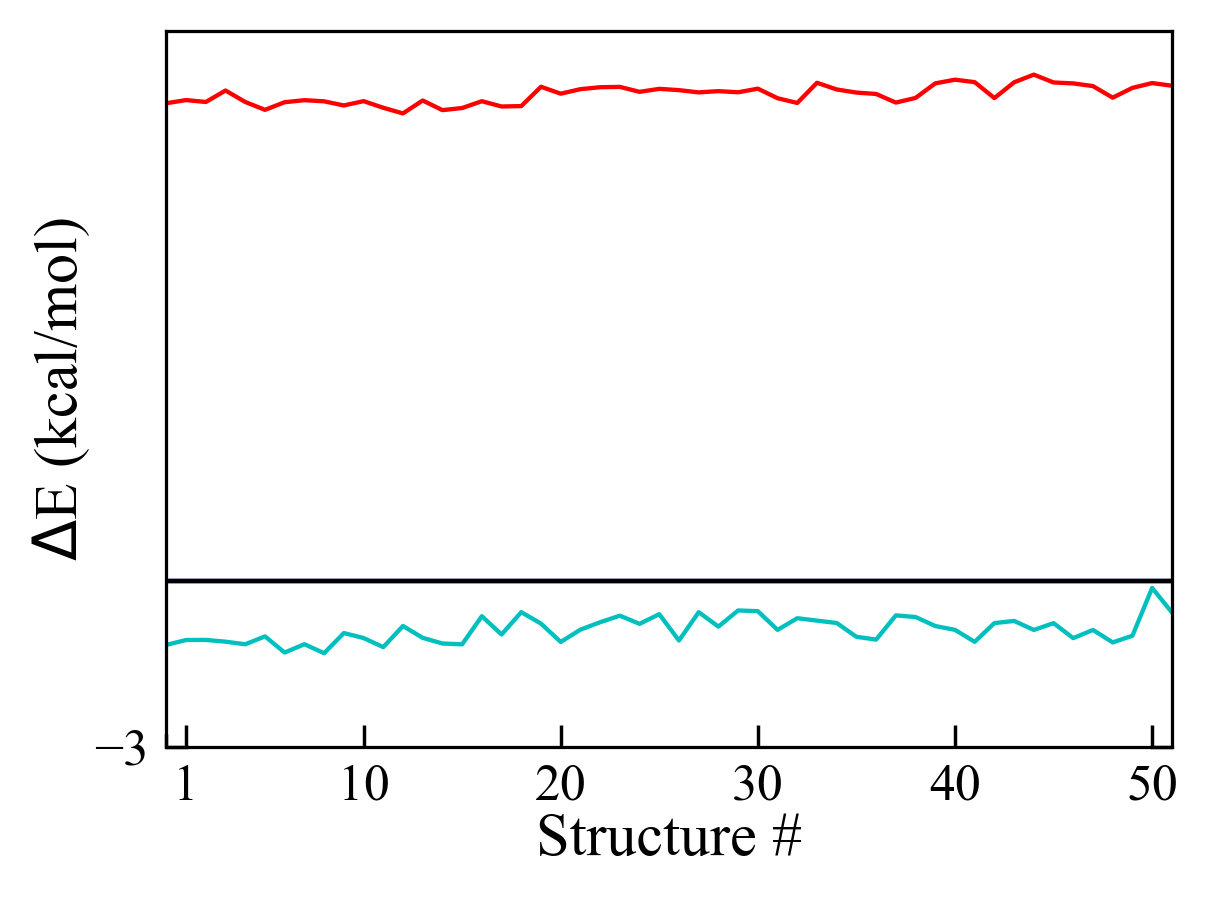

In [24]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "27Mer_vs_9Mer_b3lyp_per_molecule.png"

nsamples = 5
nlines = len(DE_nbody_Icosiheptamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(Icosiheptamer.index)
ZeroAxis = np.zeros(nlines)

pl.SetYaxis(3, (DE_nbody_Icosiheptamer_b3lyp_631g)/27, 'r', '-')
pl.SetYaxis(1, (DE_nbody_nonamer_b3lyp_631g)/9, 'c', '-')  
pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -3.0, 10.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

print(np.mean(DE_nbody_Icosiheptamer_b3lyp_631g)/27)
print(np.mean(DE_nbody_nonamer_b3lyp_631g)/9)

print(np.std(DE_nbody_Icosiheptamer_b3lyp_631g)/27)
print(np.std((DE_nbody_nonamer_b3lyp_631g)/9))

### 27Mer vs 9 Mer b3lypgd3 per molecule

6.200104894175052
-13.88983304378143
0.16667417444991023
0.21427790750343684


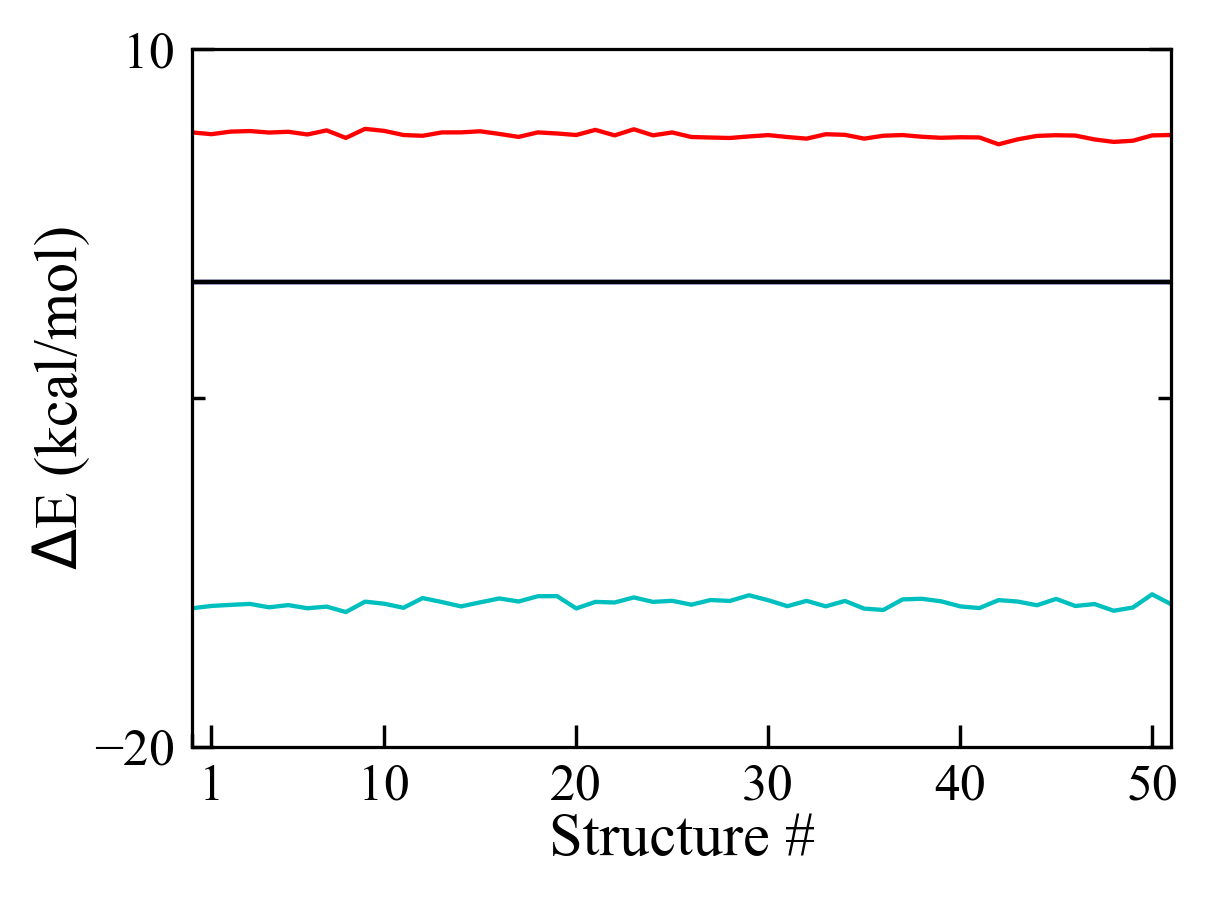

In [23]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "27Mer_vs_9Mer_b3lyp_per_molecule.png"

nsamples = 5
nlines = len(DE_nbody_Icosiheptamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(Icosiheptamer.index)
ZeroAxis = np.zeros(nlines)

pl.SetYaxis(3, (DE_nbody_Icosiheptamer_b3lypgd3_631g)/27, 'r', '-')
pl.SetYaxis(1, (DE_nbody_nonamer_b3lypgd3_631g)/9, 'c', '-')  
pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -20.0, 10.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

print(np.mean(DE_nbody_Icosiheptamer_b3lypgd3_631g)/27)
print(np.mean(DE_nbody_nonamer_b3lypgd3_631g)/9)

print(np.std(DE_nbody_Icosiheptamer_b3lypgd3_631g)/27)
print(np.std((DE_nbody_nonamer_b3lypgd3_631g)/9))


### 9Mer vs 27Mer D4 per mole

In [23]:
pl = MyPlot()

# Set plot size in dpi
pl.figure_dpi = 310

# Set filename
pl.filename = "27Mer_vs_9Mer_b3lypD4_per_molecule.png"

nsamples = 5
nlines = len(DE_nbody_Icosiheptamer_b3lyp_631g)

# Assign X, Y and Yerr
pl.Yaxis = np.ndarray((nlines,nsamples))
pl.Yerr = np.ndarray((nlines,nsamples))

pl.Xaxis = np.array(Icosiheptamer.index)
ZeroAxis = np.zeros(nlines)

pl.SetYaxis(3, (DE_nbody_Icosiheptamer_b3lyp_D4)/27, 'r', '-')
pl.SetYaxis(1, (DE_nbody_nonamer_b3lyp_D4)/9, 'c', '-')  
pl.SetYaxis(4, ZeroAxis, 'k', '-')



# Set X labels, limits and tickmarks
pl.xlabel = 'Structure #'
pl.xmin, pl.xmax           = 0.0, 51.0
pl.xtick_min, pl.xtick_max = 10.0, 10.0
pl.xticks = None
pl.xticklabels = None
pl.xticks = [1,10,20,30,40,50]
pl.xticklabels = ['1', '10', '20', '30', '40', '50']

# Set Y labels, limits and tickmarks
pl.ylabel = '$\Delta$E (kcal/mol)'
pl.ymin, pl.ymax           = -3.0, 10.0
pl.ytick_min, pl.ytick_max = 15.0, 30.0

pl.xmax = pl.xmax + 0.0001
pl.ymax = pl.ymax + 0.0001
# Do plot
pl.DoPlot()

print(np.mean(DE_nbody_Icosiheptamer_b3lyp_D4)/27)
print(np.mean(DE_nbody_nonamer_b3lyp_D4)/9)

print(np.std(DE_nbody_Icosiheptamer_b3lyp_D4)/27)
print(np.std((DE_nbody_nonamer_b3lyp_D4)/9))

NameError: name 'DE_nbody_Icosiheptamer_b3lyp_D4' is not defined